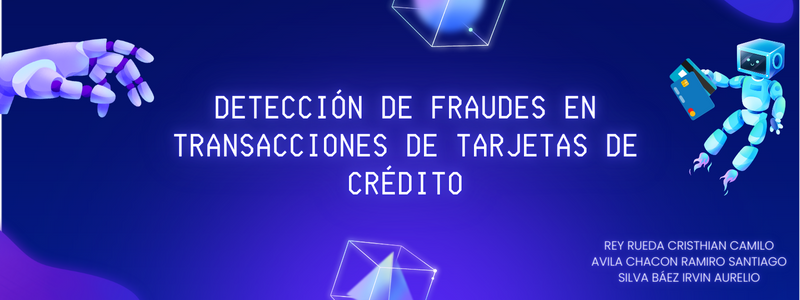

# Detección de fraudes en transacciones de tarjetas de crédito
Transacciones anónimas con tarjeta de crédito etiquetadas como fraudulentas o genuinas
## Integrantes:
- Ramiro Santiago Avila Chacon - 2191920
- Cristian Camilo Rey Rueda - 2200190
- Irving Aurelio Silva Báez - 2204128

In [ ]:
#@title **MONTAMOS EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "Proyecto_Final_IA" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Proyecto_Final_IA


In [ ]:
#@title **CARGAMOS LIBRERIAS** { display-mode: "form" }

!sudo apt-get install graphviz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__


#2da Entrega
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import graphviz
from IPython.display import Image

#Entrega final
import tensorflow as tf
from tensorflow import keras

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
data =  pd.read_csv("/content/drive/MyDrive/Proyecto_Final_IA/creditcard.csv", sep=",")
data.head(800)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,604.0,-0.197643,0.621120,2.241086,3.243027,-0.086645,1.379656,-0.219907,0.334867,-0.088410,...,-0.174403,-0.030265,-0.002859,-0.403612,-0.692032,0.097926,0.270210,0.206081,26.57,0
796,605.0,-1.807794,1.209868,0.397865,-2.633549,0.620654,-0.454815,0.257063,-5.658629,1.826113,...,-0.019280,0.209819,0.202699,-0.158566,-0.126323,-0.282856,-0.865984,-0.676772,10.00,0
797,605.0,0.888448,-0.629868,1.344220,0.715795,-1.449115,-0.188218,-0.766771,0.206372,0.540484,...,0.359282,0.736915,-0.127126,0.573479,0.085966,0.429654,-0.009815,0.045354,134.70,0
798,605.0,-1.406838,0.996384,1.886244,-0.126792,-0.049197,0.056795,0.629037,-0.524578,1.199053,...,0.017660,0.575681,-0.345084,-0.050338,0.040907,0.382420,-0.723943,-0.095763,17.50,0


In [ ]:
data[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Comprobamos la columna "class" y las que tengan el valor de 0 las asignamos con transacciones genuinas. Y para el 1 como fraude

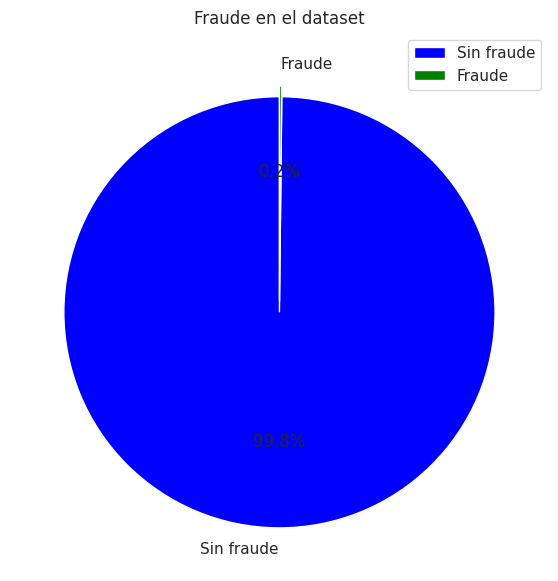

In [ ]:
sns.set(style="whitegrid")
labels = ['Sin fraude', 'Fraude']
sizes = data['Class'].value_counts(sort = True)

colors = ["blue","green"]
explode = (0.05,0)

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%0.1f%%', shadow=False, startangle=90,)

plt.title('Fraude en el dataset')
plt.legend()
plt.show()

Revisamos la correlación

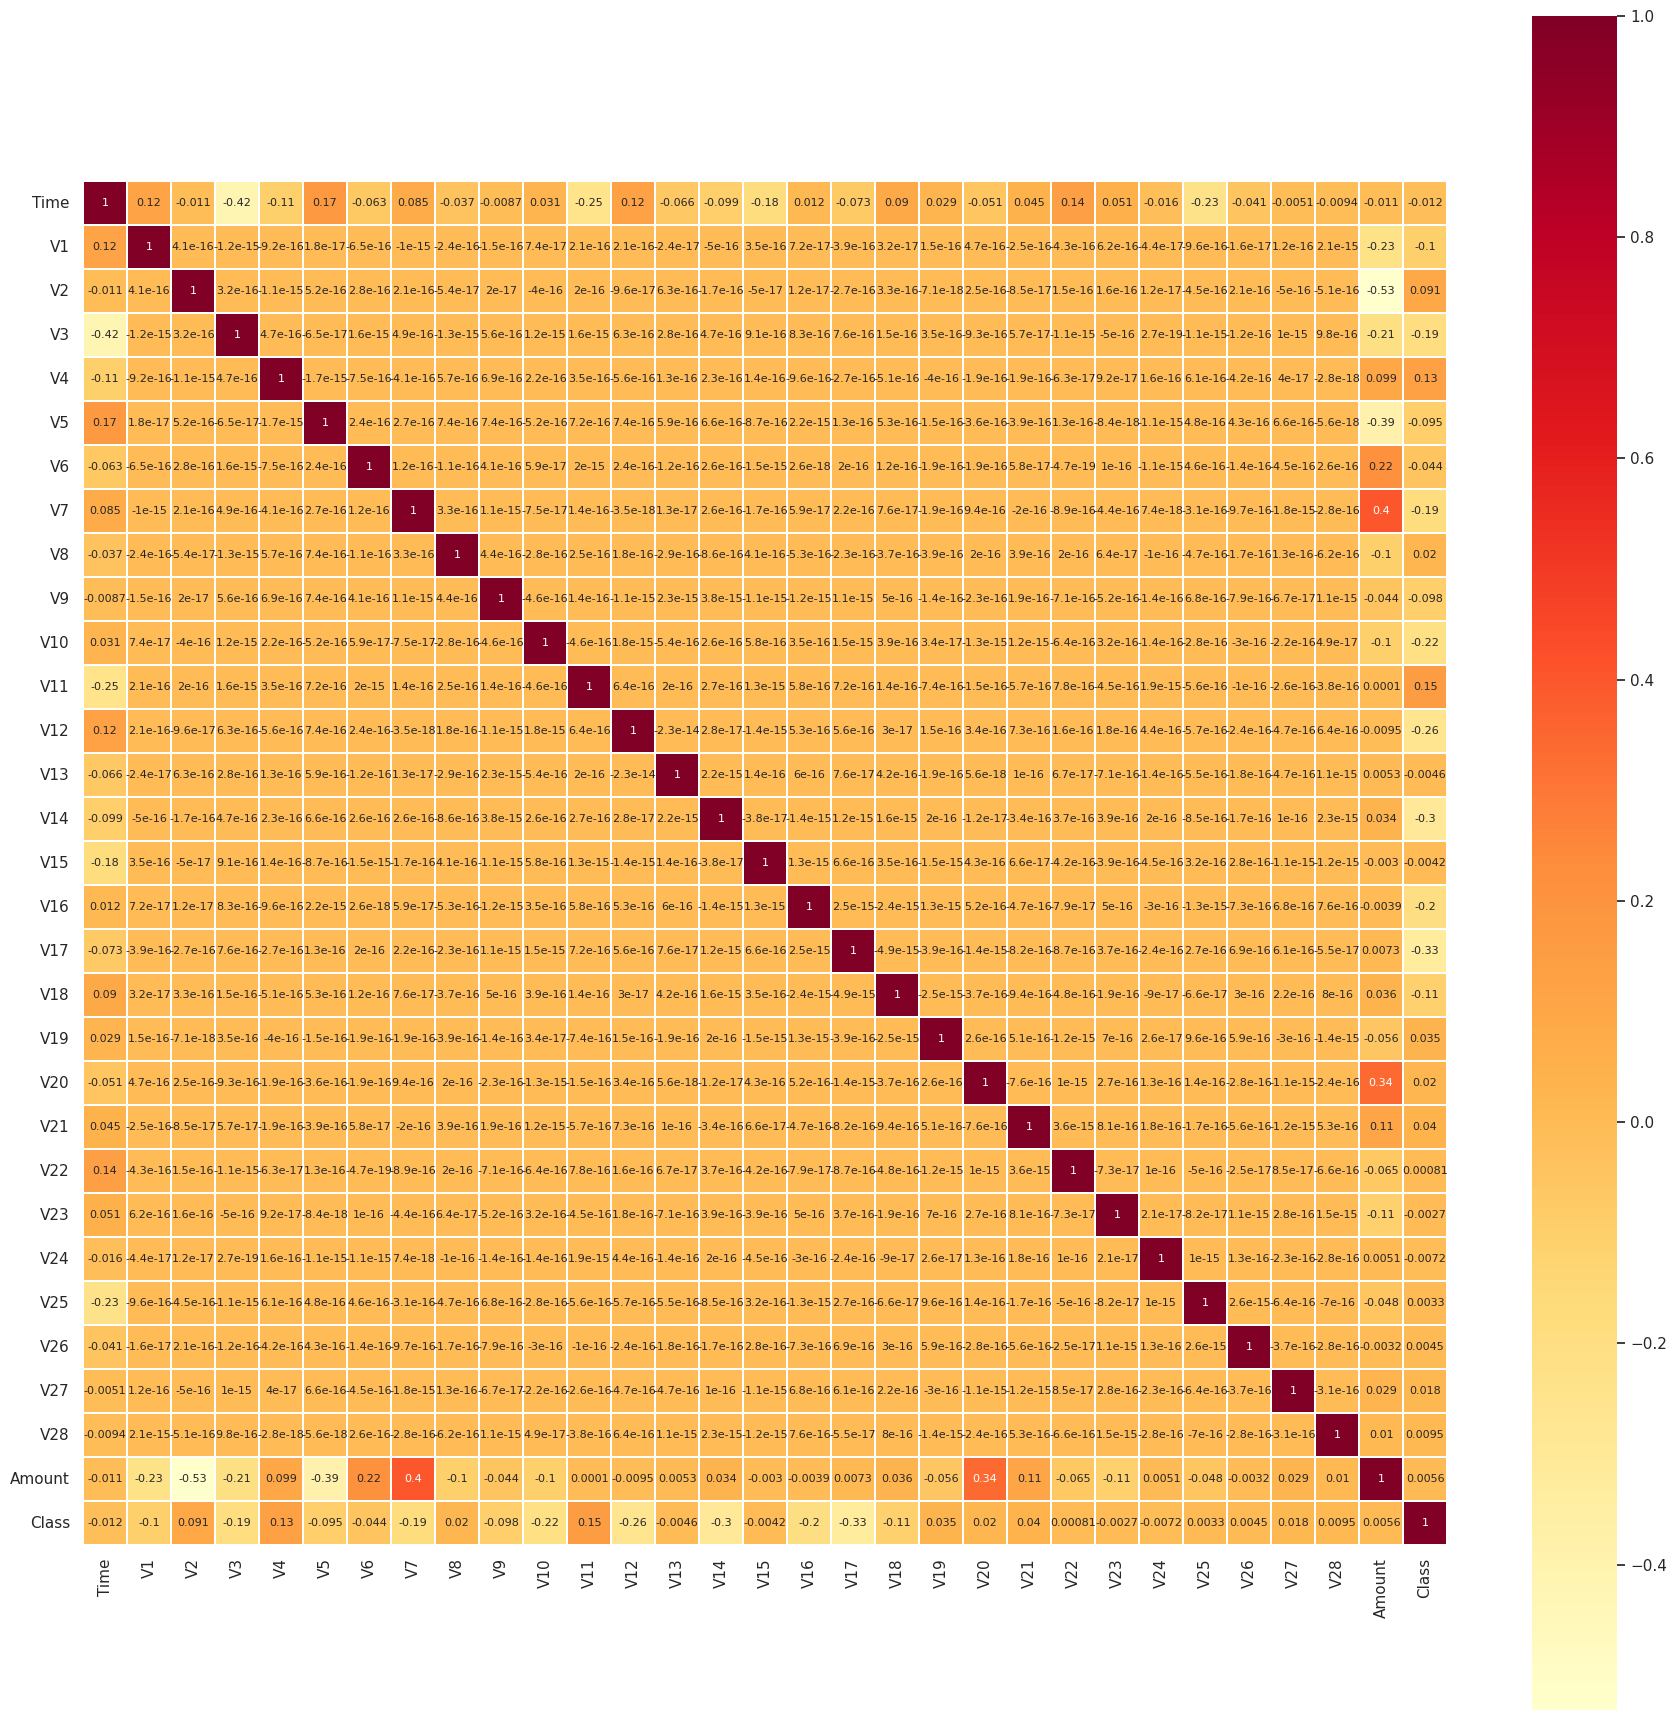

In [ ]:
plt.figure(figsize=(22,22))

sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap = 'YlOrRd', linecolor='white', annot=True, annot_kws={"size": 8})
plt.show()

In [ ]:
fraude = data[data['Class']==1]
genuina = data[data['Class']==0]

print('Transacciones no fraudulentas', round(data['Class'].value_counts()[0]/len(data) * 100,2), '%')
print('Transacciones fraudulentas', round(data['Class'].value_counts()[1]/len(data) * 100,2), '%')

Transacciones no fraudulentas 99.83 %
Transacciones fraudulentas 0.17 %


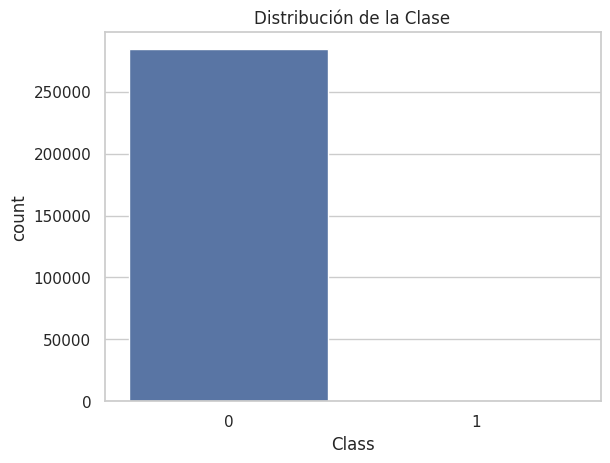

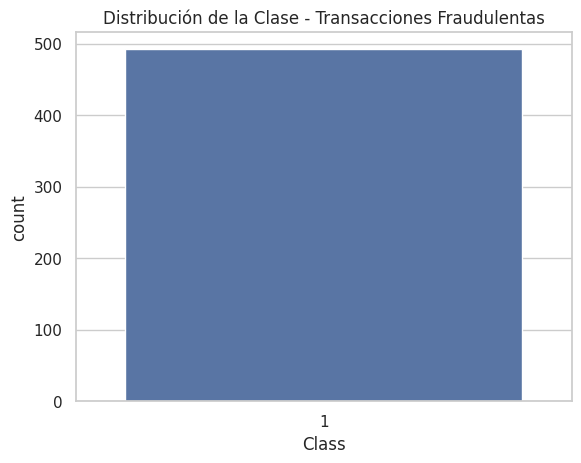

In [ ]:
# Visualización de la distribución de los datos en la columna 'Class'
sns.countplot(x='Class', data=data)
plt.title('Distribución de la Clase')
plt.show()

# Visualización de la distribución de la Clase
sns.countplot(x='Class', data=fraude)
plt.title('Distribución de la Clase - Transacciones Fraudulentas')
plt.show()

### Grafica de frecuencia de transacciones fraudulentas

<ipython-input-10-52fe47fc8a33>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraude["Hour"] = fraude["DateTime"].dt.hour


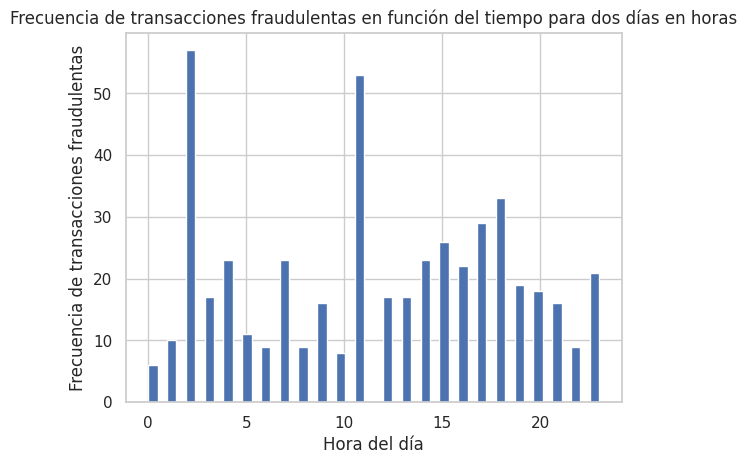

In [ ]:
# Agrega la cantidad de segundos correspondiente a la fecha y hora de inicio de los datos
start_time = pd.to_datetime('2013-09-01 00:00:00').timestamp()
data["DateTime"] = pd.to_datetime(data["Time"] + start_time, unit='s')

# Filtra las transacciones fraudulentas
fraude = data[data["Class"] == 1]

# Crea una columna adicional con solo la hora de la transacción
fraude["Hour"] = fraude["DateTime"].dt.hour

# Crea el histograma con 48 divisiones (24 horas por día x 2 días)
plt.hist(fraude["Hour"], bins=48)

# Agrega etiquetas y título
plt.xlabel("Hora del día")
plt.ylabel("Frecuencia de transacciones fraudulentas")
plt.title("Frecuencia de transacciones fraudulentas en función del tiempo para dos días en horas")

# Muestra la gráfica
plt.show()


En la gráfica que muestra la frecuencia de transacciones fraudulentas en función del tiempo para dos días en horas, si la hora del día 1 tiene una frecuencia de 10 significa que se detecto una frecuencia 10 transacciones fraudulentas en la primera hora de ambos dias.

De esta manera, se crea una nueva columna "Hour" apartir de la "Time" que bien es la columna que registra el tiempo en segundos entre transacciones para 2 dias.

In [ ]:
print(fraude[['DateTime', 'Hour']].head())
print(fraude[['DateTime', 'Hour']].tail())

                DateTime  Hour
541  2013-09-01 00:06:46     0
623  2013-09-01 00:07:52     0
4920 2013-09-01 01:14:22     1
6108 2013-09-01 01:56:26     1
6329 2013-09-01 02:05:19     2
                  DateTime  Hour
279863 2013-09-02 22:59:02    22
280143 2013-09-02 23:02:27    23
280149 2013-09-02 23:02:31    23
281144 2013-09-02 23:12:46    23
281674 2013-09-02 23:19:08    23


### Grafica de frecuencia de transacciones no fraudulentas



<ipython-input-12-82cc561b6272>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genuina["Hour"] = genuina["DateTime"].dt.hour


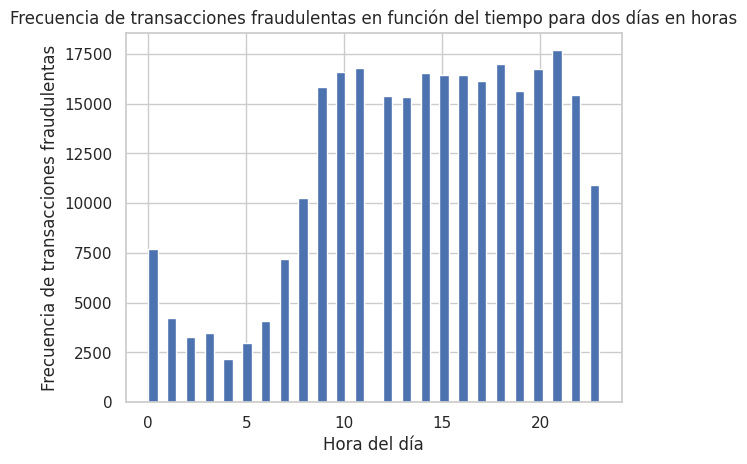

In [ ]:
# Agrega la cantidad de segundos correspondiente a la fecha y hora de inicio de los datos
start_time = pd.to_datetime('2013-09-01 00:00:00').timestamp()
data["DateTime"] = pd.to_datetime(data["Time"] + start_time, unit='s')

# Filtra las transacciones fraudulentas
genuina = data[data["Class"] == 0]

# Crea una columna adicional con solo la hora de la transacción
genuina["Hour"] = genuina["DateTime"].dt.hour

# Crea el histograma con 48 divisiones (24 horas por día x 2 días)
plt.hist(genuina["Hour"], bins=48)

# Agrega etiquetas y título
plt.xlabel("Hora del día")
plt.ylabel("Frecuencia de transacciones fraudulentas")
plt.title("Frecuencia de transacciones fraudulentas en función del tiempo para dos días en horas")

# Muestra la gráfica
plt.show()

### Distribuciones de tiempo y cantidad

<ipython-input-13-cd7ff9b05b72>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
<ipython-input-13-cd7ff9b05b72>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


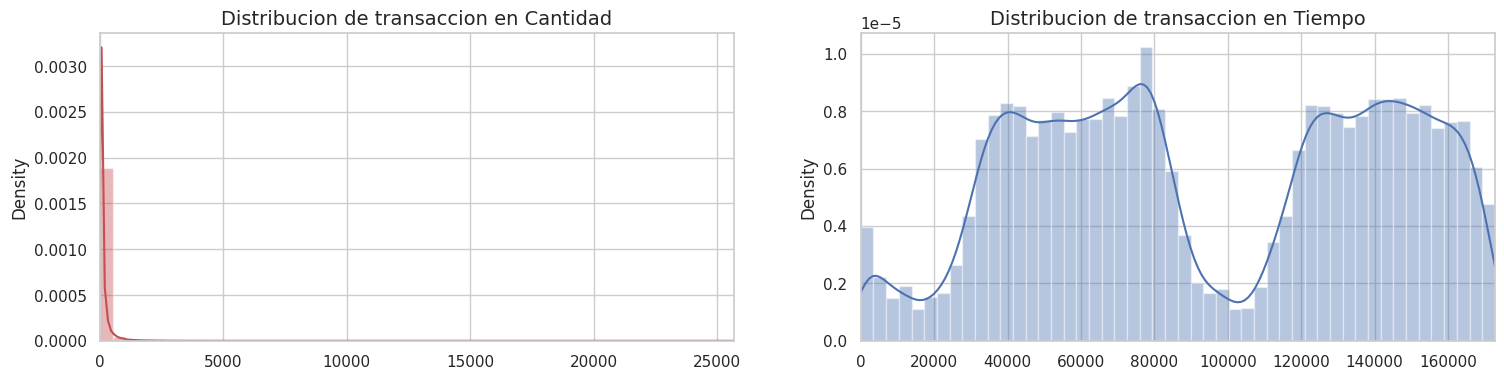

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribucion de transaccion en Cantidad', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribucion de transaccion en Tiempo', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

### Violinplot de Cantidad vs Tiempo entre transacciones

In [ ]:
print(data['Amount'].max())
print(data['Amount'].min())

25691.16
0.0


<Axes: xlabel='Class', ylabel='Time'>

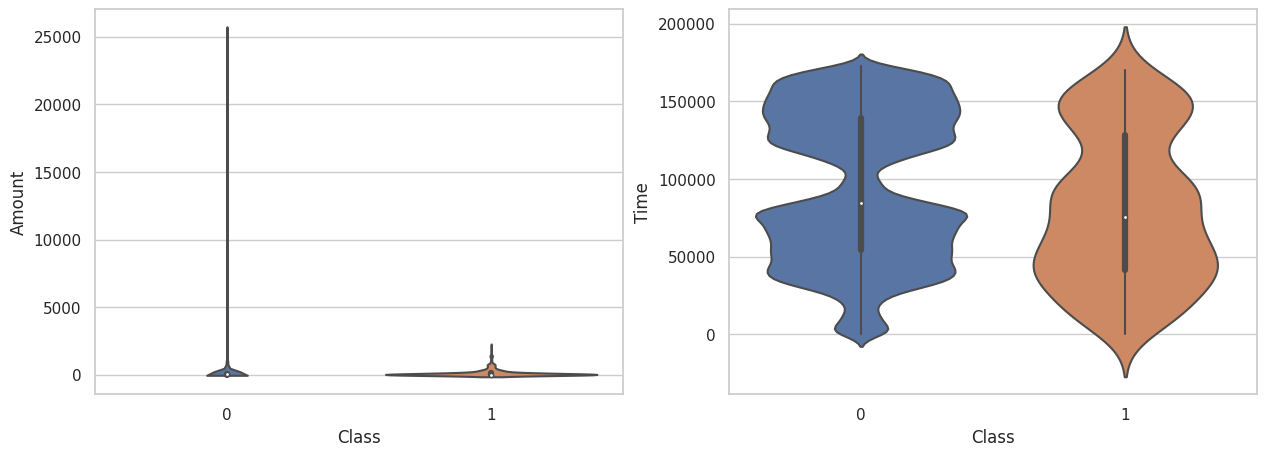

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.violinplot(x="Class", y="Amount", data=data)
plt.subplot(1,2,2)
sns.violinplot(x="Class", y="Time", data=data)

### Ahora tracemos las distribuciones de cada una de las características para tener una idea de cuán asimétricas son las características.

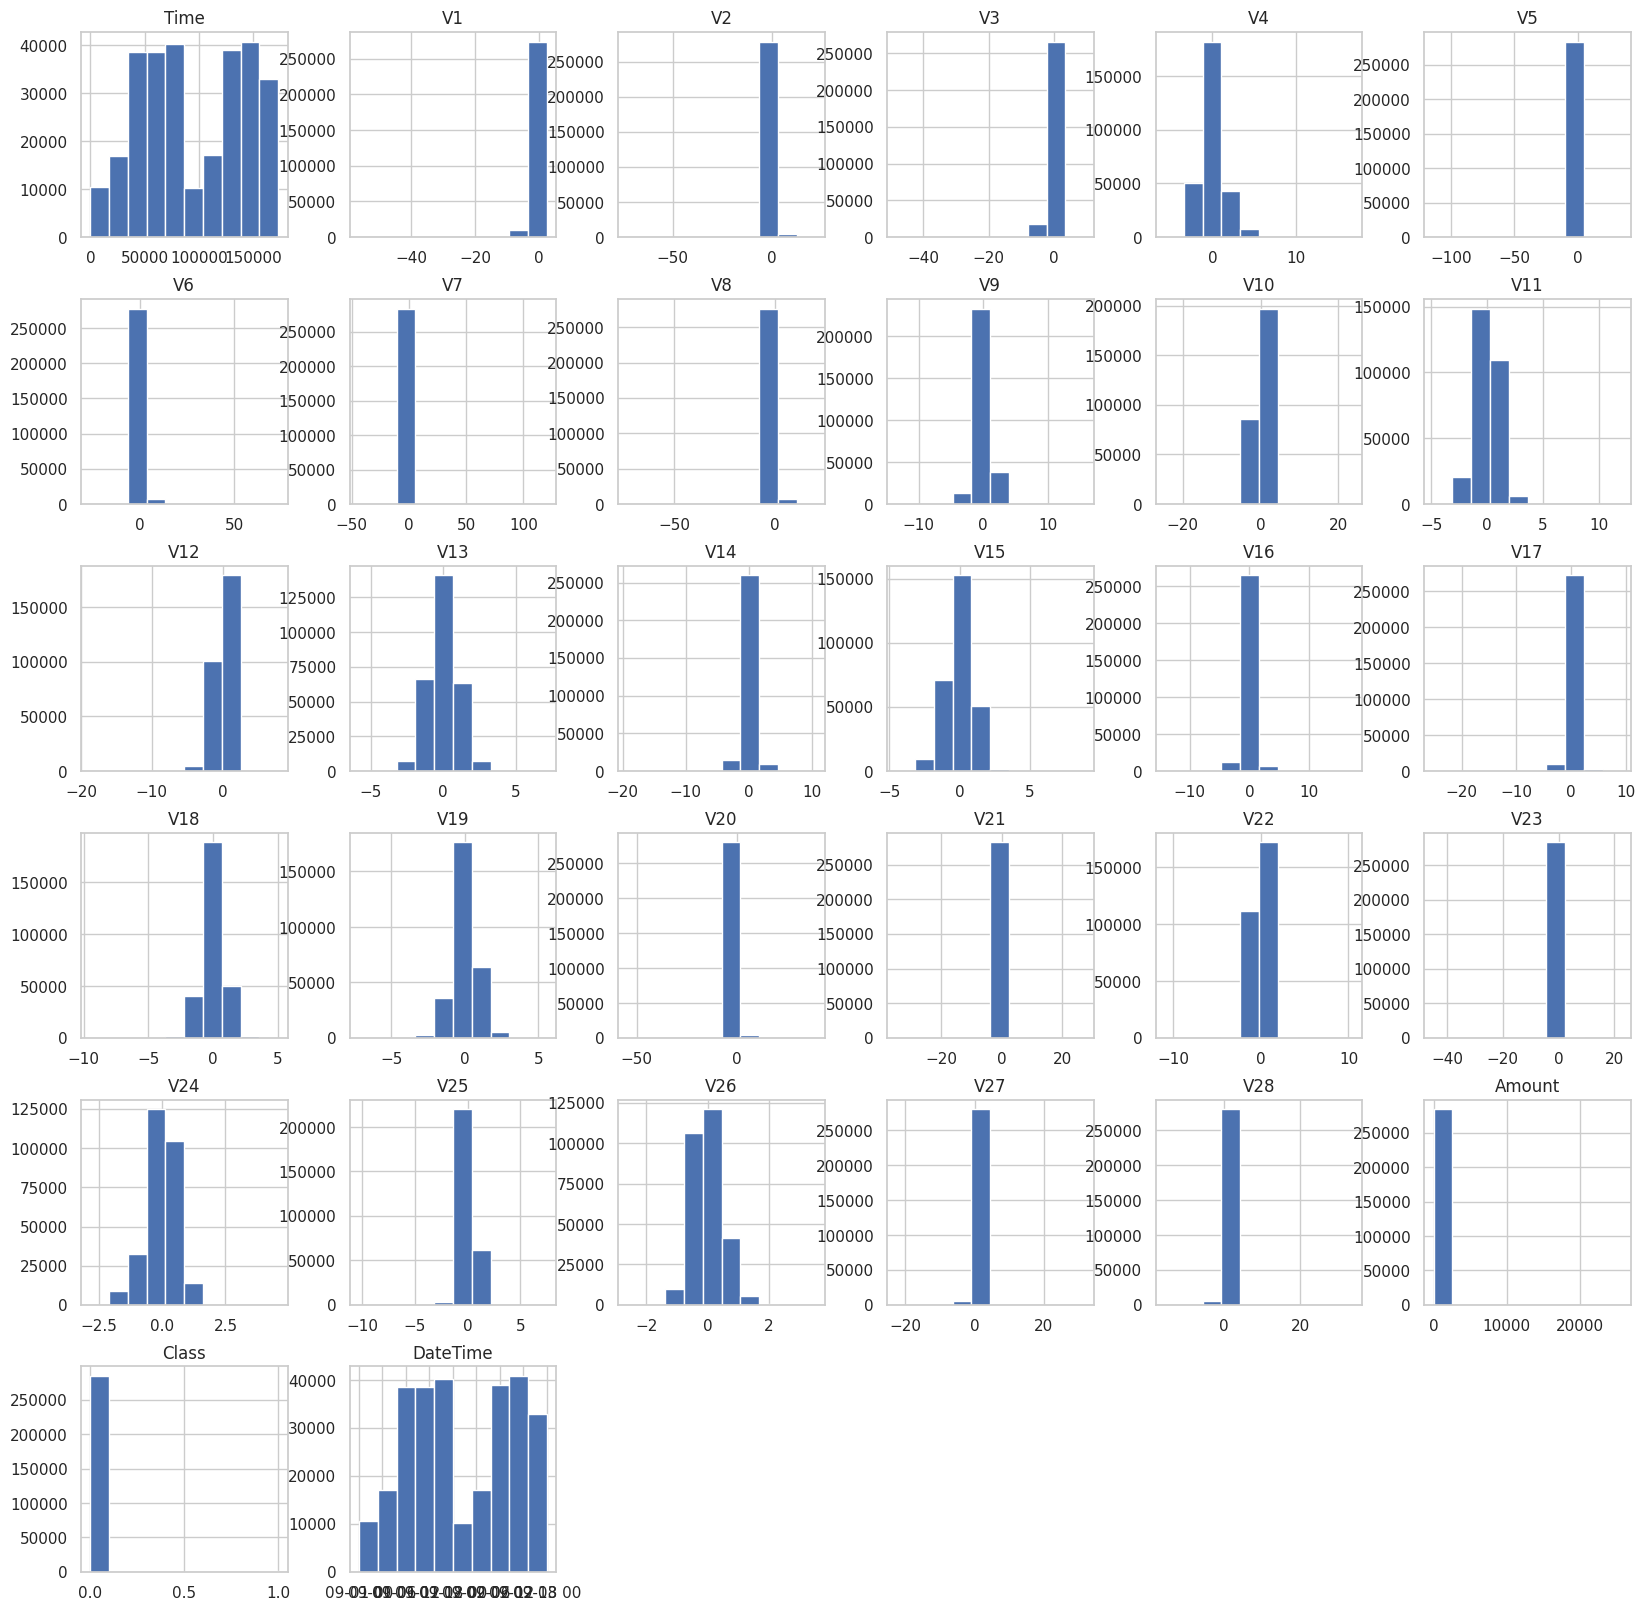

In [ ]:
data.hist(figsize = (20, 20))
plt.show()

# **SEGUNDA ENTREGA**

# Sección de entrenamiento

## Datos de entrenamiento

- Time: Número de segundos transcurridos entre transacciones en el conjunto de datos.

- V1...V28: Resultado de una reducción de la dimensionalidad de PCA (Análisis de componentes principales) para proteger las identidades de los usuarios y las funciones confidenciales (v1-v28).

- Amount: Cantidad de transacción

- Class: 1 para transacciones fraudulentas, 0 en caso contrario

- DateTime: Fecha y hora en segundos transcurridos entre transacciones abarcando los dos dias donde se registraron las transacciones fraudulentas.

- Hour: Tiempo transcurrido en horas.

- scaledAmount: Escala obtenida de la columna de Amount tras realizar el metodo RobustScaler (transformar los datos en una escala resistente a los valores atípicos).

- scaledTime: Escala obtenida de la columna de Time tras realizar el metodo RobustScaler (transformar los datos en una escala resistente a los valores atípicos).


## Pre-procesamiento

Datos escalados de Amount y Time

In [ ]:
#Usamos RobustScaler() para escalar los datos
data["Hour"] = data["DateTime"].dt.hour
data['scaledAmount'] = RobustScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data['scaledTime'] = RobustScaler().fit_transform(data['Time'].values.reshape(-1,1))

#Una vez extraidos los datos de Amount y Time ya no seran utiles, los removemos
data = data.drop('Amount', axis = 1)
data = data.drop('Time', axis = 1)
data = data.drop('DateTime', axis = 1)
data = data.drop('Hour', axis = 1)

#Acomadamos las nuevas metricas en las primeras columnas
columnas_escaladas = ['scaledAmount' , 'scaledTime']
otras_columnas = [col for col in data.columns if col not in columnas_escaladas]
nuevo_orden = ['scaledAmount','scaledTime'] + otras_columnas
data = data[nuevo_orden]

data.head()

,scaledAmount,scaledTime,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Submuestreo
Hay 492 casos de fraude en nuestro conjunto de datos, por lo que podemos obtener aleatoriamente 492 casos sin fraude para crear nuestro nuevo marco de datos secundario. Concatenamos los 492 casos de fraude y no fraude, creando una nueva submuestra.

In [ ]:
#Dividimos los datos para entrenar y testear
train, test = train_test_split(data, test_size=0.2, random_state=42)
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (227845, 31)
Test Shape: (56962, 31)


In [ ]:
#Creamos la submuestra para las clases con distribuciones balanceadas.
son_fraude = train.Class.value_counts()[1]

print('Hay {} transacciones fraudulentas en los datos de entrenamiento.'.format(son_fraude))

Hay 394 transacciones fraudulentas en los datos de entrenamiento.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
no_fraude = train[train['Class'] == 0]
fraude = train[train['Class'] == 1]
#Obtenemos el DataFrame selected que corresponden a las transacciones no fraudulentas seleccionadas aleatoriamente.
selected = no_fraude.sample(n=son_fraude, random_state=42)
selected.head()

,scaledAmount,scaledTime,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
106396,0.489206,-0.173193,1.284213,-0.501464,-0.357034,-2.105217,-0.438960,-1.008206,0.096926,-0.295436,...,0.063061,-0.202416,-0.393263,-0.207654,-0.405794,0.817223,-0.851350,0.059367,0.023643,0
238046,0.915671,0.761405,0.155404,-0.039331,-0.563432,-0.478156,0.985475,0.859321,0.577935,0.379662,...,-0.134477,0.507181,1.405727,0.137711,-1.434481,-0.521119,-0.049328,0.049098,-0.030566,0
107344,0.302662,-0.167988,1.135878,0.029953,0.323076,1.133289,-0.174560,0.004576,-0.148293,0.061964,...,-0.118918,0.195802,0.553511,-0.213152,-0.424880,0.640881,-0.125404,0.034163,0.021453,0
274061,0.069867,0.953312,1.992833,0.144782,-1.618801,1.410094,0.373586,-1.152419,0.642564,-0.402493,...,-0.289128,0.056648,0.332903,-0.013404,-0.017312,0.438219,-0.490139,-0.020661,-0.059648,0
271673,-0.167680,0.939767,-0.385451,0.672831,0.987344,-0.948938,0.740487,-0.150095,1.075317,-0.279940,...,-0.047132,0.008414,0.307288,-0.567814,0.657006,1.060964,0.270908,-0.389675,-0.300019,0


In [ ]:
subsample = pd.concat([selected, fraude])
len(subsample)

788

In [ ]:
subsample = subsample.sample(frac=1, random_state=42).reset_index(drop=True)
subsample.head()

,scaledAmount,scaledTime,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.296653,0.852830,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,...,0.562030,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,1
1,-0.111926,-0.981590,-0.461720,1.103487,1.659896,0.804520,0.183641,-0.612299,0.964205,-0.448733,...,0.063362,0.042122,0.278355,-0.130014,0.398938,-0.264411,-0.470755,-0.262926,-0.069644,0
2,-0.219940,-0.030839,-2.897204,-1.110662,1.577676,2.045158,0.637561,0.404171,-0.724230,0.759310,...,-0.822138,-0.658007,-0.391521,1.510343,-0.462301,0.459556,-0.261734,0.517106,-0.171348,0
3,0.011179,0.713554,1.941449,-0.951390,-0.134765,-1.471945,-1.301922,-0.616728,-0.999723,0.106526,...,-0.160436,0.148056,0.618041,0.240949,0.037191,-0.437048,-0.327143,0.049057,-0.039995,0
4,13.246699,-0.379551,-3.497091,-2.593990,1.053806,0.770077,-2.614110,2.450047,3.475583,-0.043620,...,-0.231661,0.120284,0.855803,2.019698,-0.328513,0.684218,-0.312405,0.548404,-0.281907,0


Text(0.5, 0, 'Clase (0:No Fraudulenta, 1:Fraudulenta)')

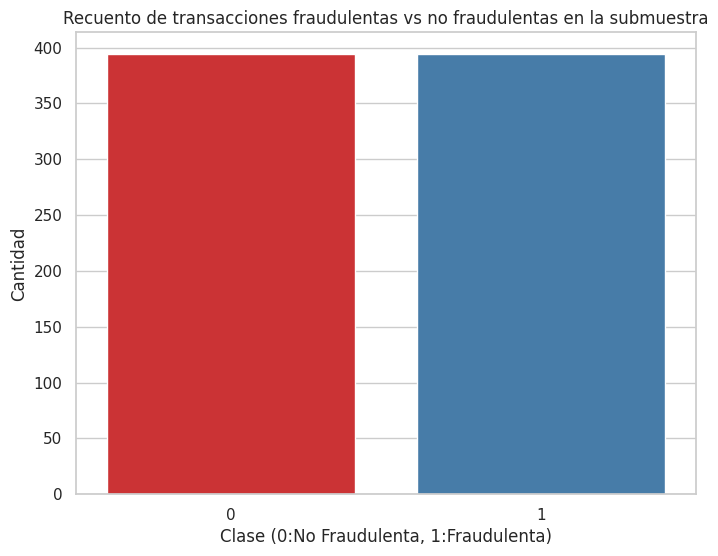

In [ ]:
#Realizamos la grafica de recuento de transacciones fraudulentas y genuinas para la submuestra
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts, palette='Set1')
plt.title('Recuento de transacciones fraudulentas vs no fraudulentas en la submuestra')
plt.ylabel('Cantidad')
plt.xlabel('Clase (0:No Fraudulenta, 1:Fraudulenta)')

## Extracción de caracteristicas

In [ ]:
corr = subsample.corr()
corr = corr[['Class']]
corr_sorted = corr.sort_values(by='Class', ascending=False)
corr_sorted

,Class
Class,1.000000
V4,0.720479
V11,0.682147
V2,0.481879
V19,0.263854
V20,0.184060
V21,0.154317
V28,0.127261
scaledAmount,0.107461
V26,0.088236


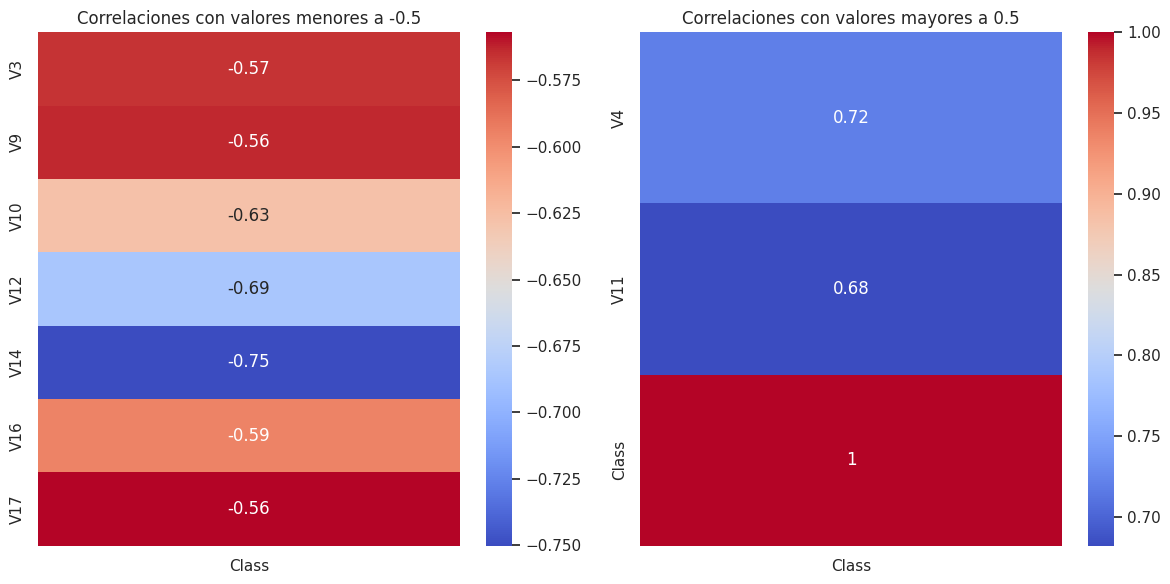

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Graficar correlaciones con valores menores a -0.5
corr_neg = corr[corr.Class <= -0.5]
sns.heatmap(corr_neg, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlaciones con valores menores a -0.5')

# Graficar correlaciones con valores mayores a 0.5
corr_pos = corr[corr.Class > 0.5]
sns.heatmap(corr_pos, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlaciones con valores mayores a 0.5')

plt.tight_layout()
plt.show()

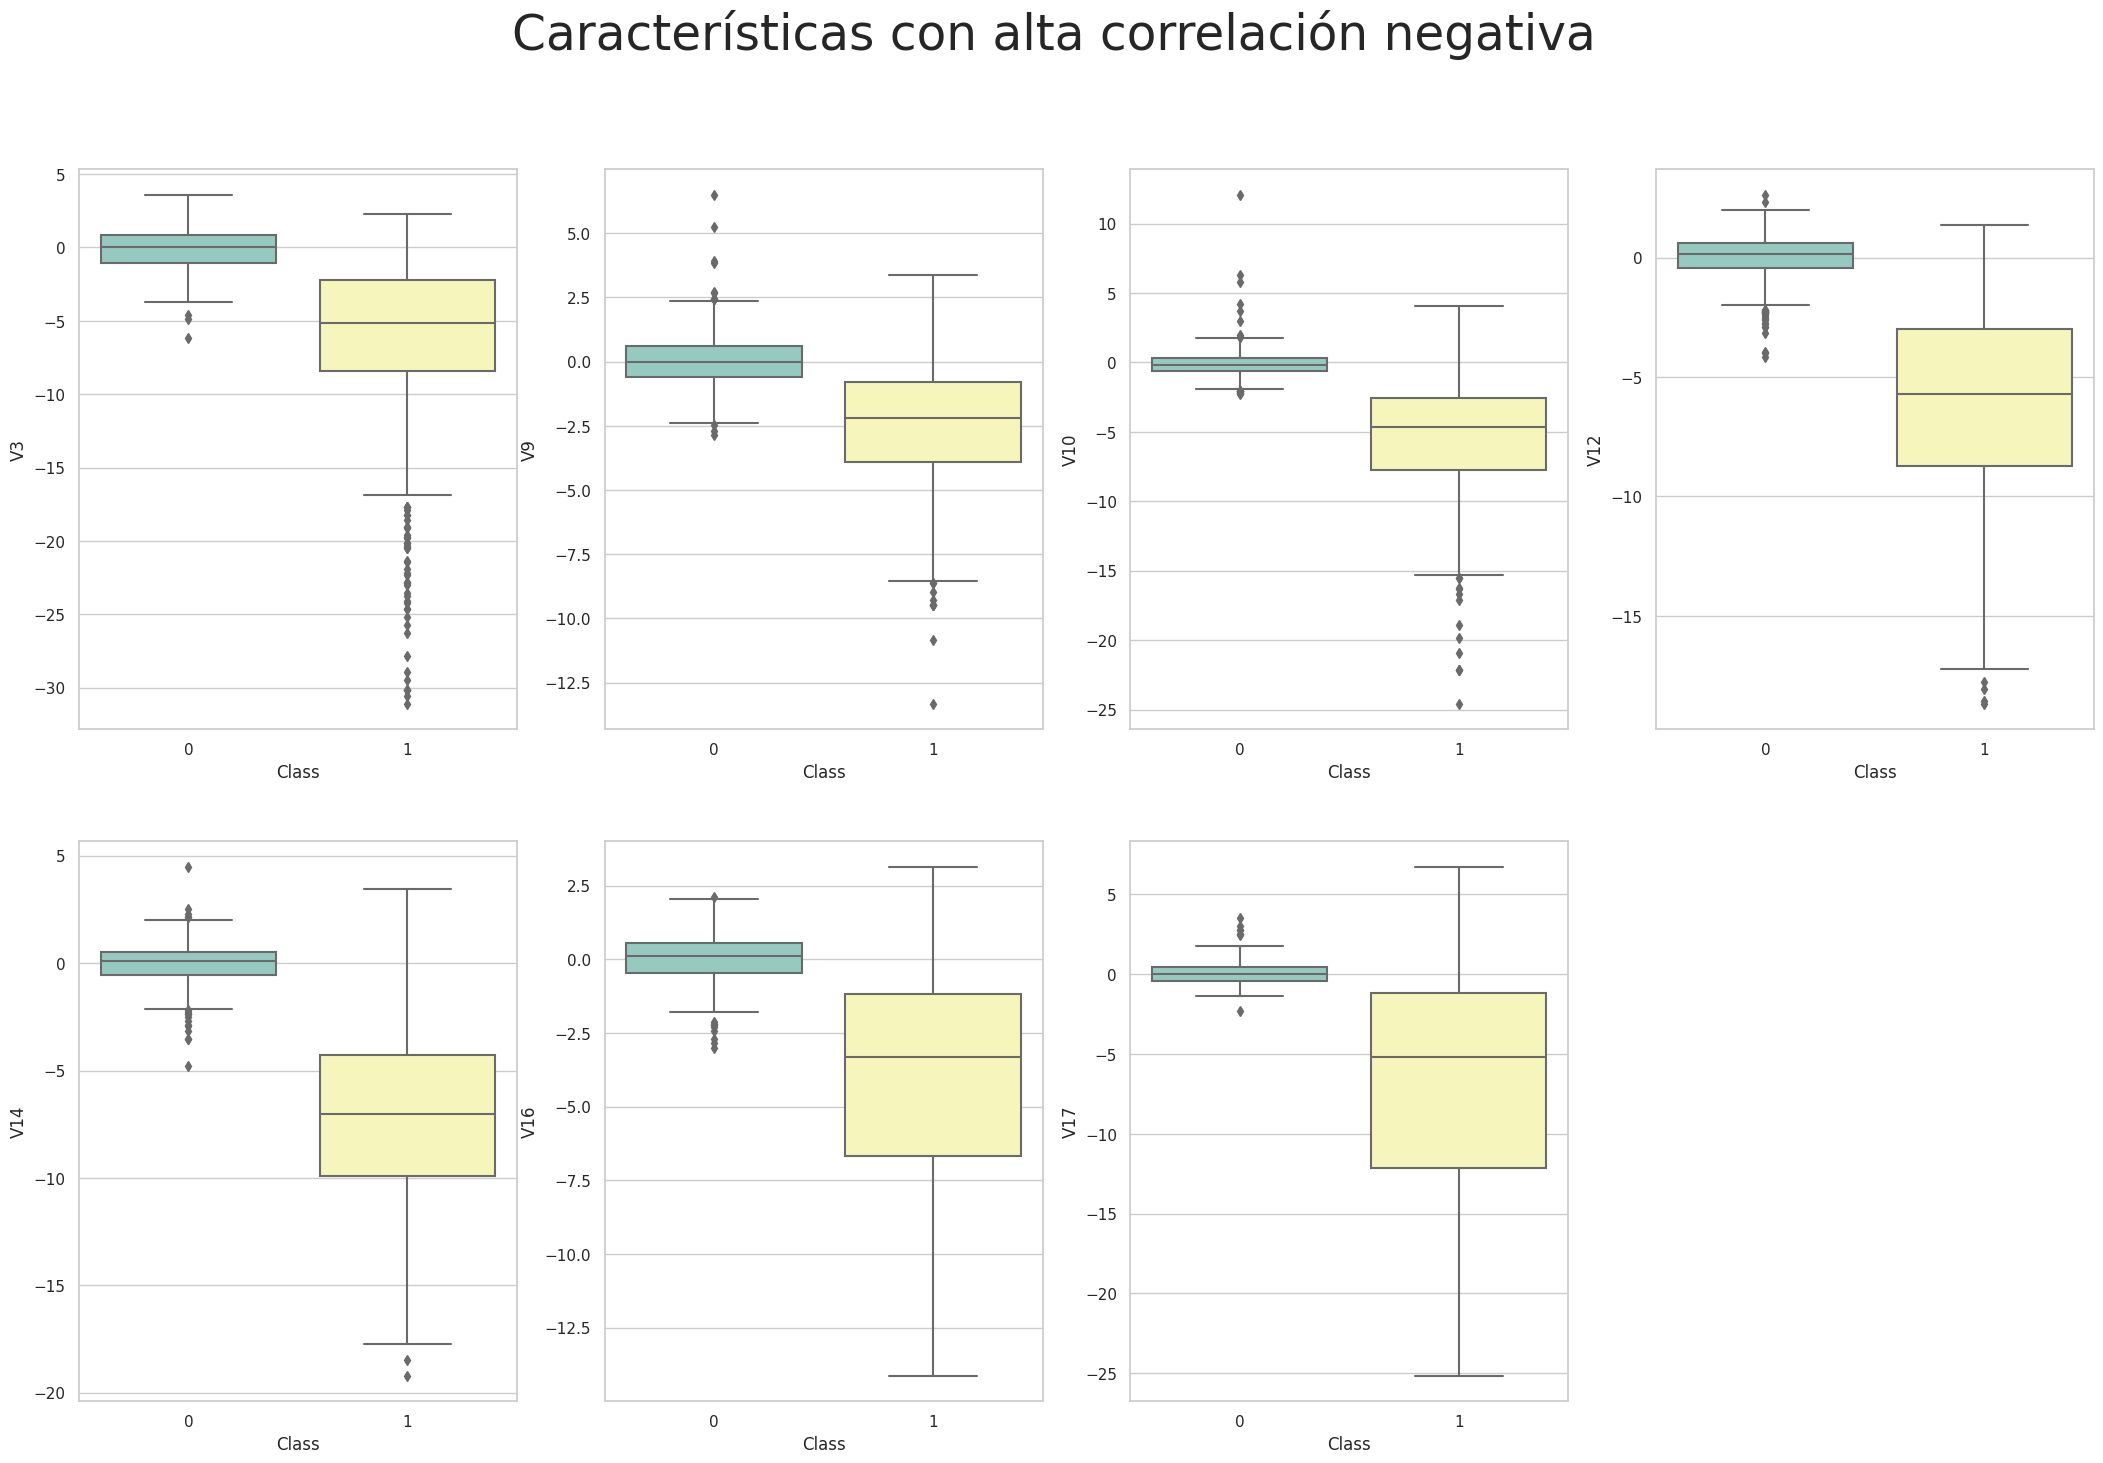

In [ ]:
#Visualizando la correlación negativa
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Características con alta correlación negativa', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0], palette='Set3')
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1], palette='Set3')
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2], palette='Set3')
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3], palette='Set3')
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0], palette='Set3')
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1], palette='Set3')
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2], palette='Set3')
f.delaxes(axes[1,3])

plt.show()

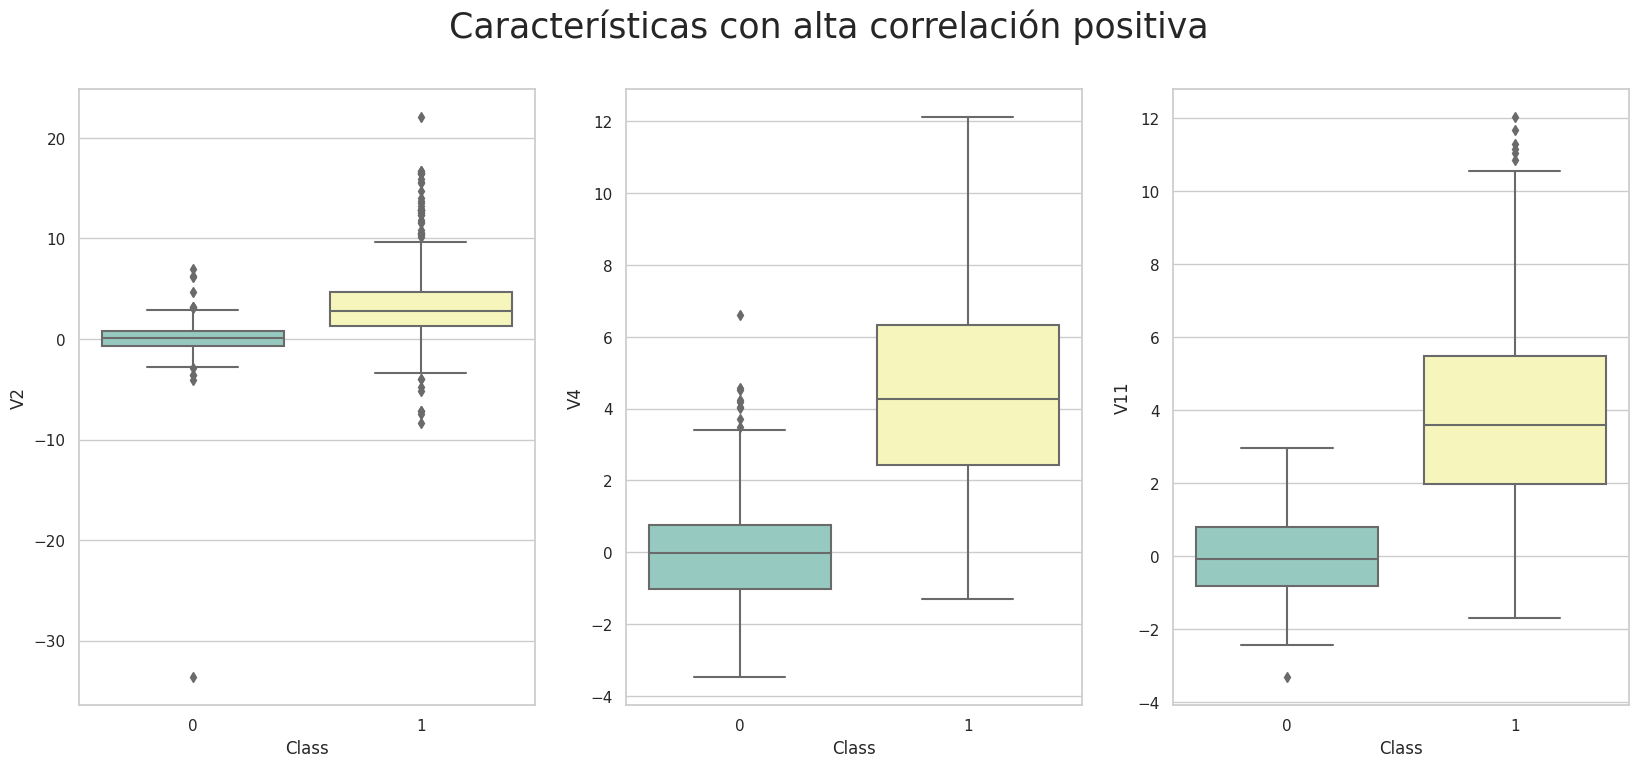

In [ ]:
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

f.suptitle('Características con alta correlación positiva', size=25)
sns.boxplot(x="Class", y="V2", data=subsample, ax=axes[0], palette='Set3')
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[1], palette='Set3')
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[2], palette='Set3')

plt.show()

In [ ]:
#Remover outliers para las variables de correlacion negativa
variables_n = ['V3', 'V9', 'V10', 'V12', 'V14']
#Decidimos usar un umbral basado en percentiles para remover los outliers
for variable in variables_n:
    variable_fraud = subsample.loc[subsample['Class'] == 1, variable]
    variable_lower = variable_fraud.quantile(0.25) - 1.5 * (variable_fraud.quantile(0.75) - variable_fraud.quantile(0.25))
    variable_upper = variable_fraud.quantile(0.75) + 1.5 * (variable_fraud.quantile(0.75) - variable_fraud.quantile(0.25))

    outliers = variable_fraud[(variable_fraud < variable_lower) | (variable_fraud > variable_upper)]
    subsample = subsample.drop(outliers.index)

    print('Feature {} Outliers for Fraud Cases: {}'.format(variable, len(outliers)))
    print('{} outliers: {}'.format(variable, outliers))
    print('----' * 44)

Feature V3 Outliers for Fraud Cases: 0
V3 outliers: Series([], Name: V3, dtype: float64)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Feature V9 Outliers for Fraud Cases: 0
V9 outliers: Series([], Name: V9, dtype: float64)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Feature V10 Outliers for Fraud Cases: 0
V10 outliers: Series([], Name: V10, dtype: float64)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Feature V12 Outliers for Fraud Cases: 0
V12 outliers: Series([], Name: V12, dtype: float64)
-----------------------------------------------------------------------------------------------------------

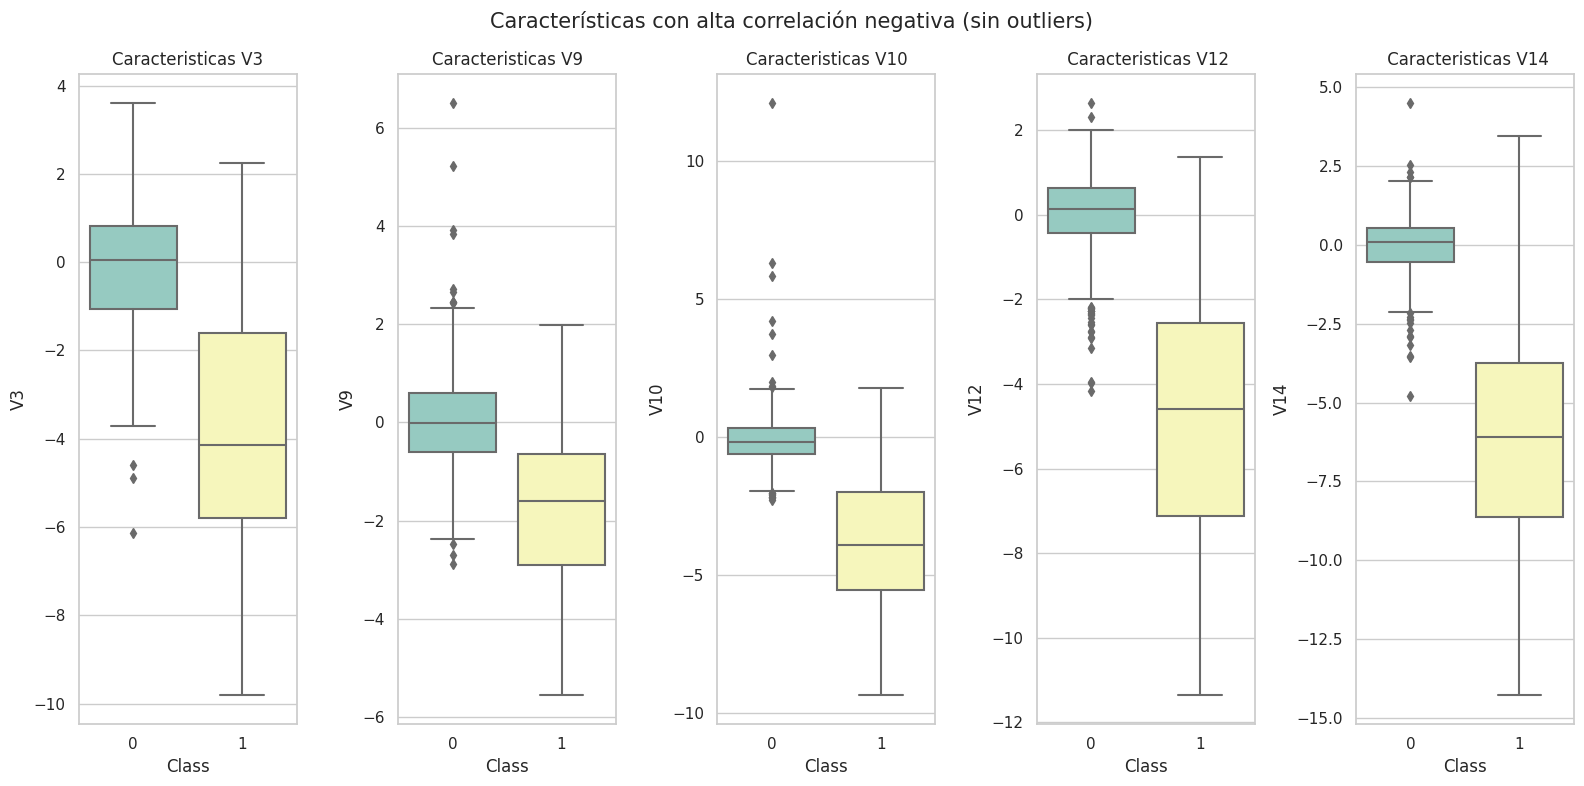

In [ ]:
#Diagrama de cajas con outliers removidos
f, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,8))
f.suptitle('Características con alta correlación negativa (sin outliers)', size=15)
titulos = ['Caracteristicas V3', 'Caracteristicas V9', 'Caracteristicas V10', ' Caracteristicas V12', ' Caracteristicas V14']
# Iteraramos sobre los subplots y les agregamos los titulos
for i, ax in enumerate(axes):
    sns.boxplot(x='Class', y=variables_n[i], data=subsample, ax=ax, palette='Set3')
    ax.set_title(titulos[i])

plt.tight_layout()
plt.show()

In [ ]:
#Remover outliers para las variables de correlacion positiva
variables_p = ['V2', 'V11']
#Decidimos usar un umbral basado en percentiles para remover los outliers
for variable in variables_p:
    variable_fraud = subsample.loc[subsample['Class'] == 1, variable]
    variable_lower = variable_fraud.quantile(0.25) - 1.5 * (variable_fraud.quantile(0.75) - variable_fraud.quantile(0.25))
    variable_upper = variable_fraud.quantile(0.75) + 1.5 * (variable_fraud.quantile(0.75) - variable_fraud.quantile(0.25))

    outliers = variable_fraud[(variable_fraud < variable_lower) | (variable_fraud > variable_upper)]
    subsample = subsample.drop(outliers.index)

    print('Feature {} Outliers for Fraud Cases: {}'.format(variable, len(outliers)))
    print('{} outliers: {}'.format(variable, outliers))
    print('----' * 44)


Feature V2 Outliers for Fraud Cases: 0
V2 outliers: Series([], Name: V2, dtype: float64)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Feature V11 Outliers for Fraud Cases: 0
V11 outliers: Series([], Name: V11, dtype: float64)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


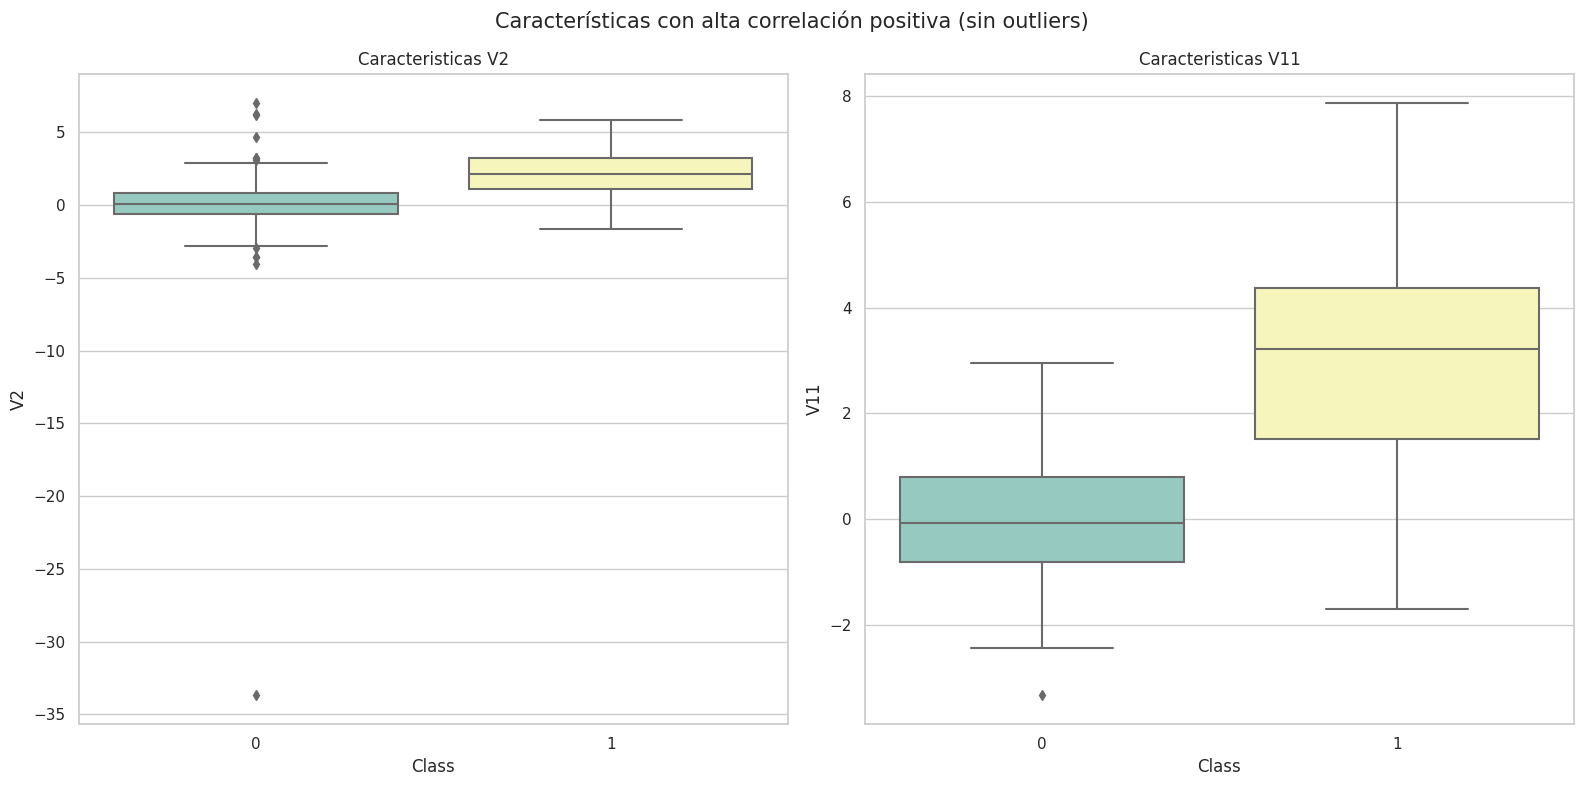

In [ ]:
#Diagrama de cajas con outliers removidos
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
f.suptitle('Características con alta correlación positiva (sin outliers)', size=15)
titulos = ['Caracteristicas V2', 'Caracteristicas V11']
# Iteraramos sobre los subplots y les agregamos los titulos
for i, ax in enumerate(axes):
    sns.boxplot(x='Class', y=variables_p[i], data=subsample, ax=ax, palette='Set3')
    ax.set_title(titulos[i])

plt.tight_layout()
plt.show()

## Aprendizaje de algortimos



### 1. Gaussian Naive Bayes

In [ ]:
X = subsample.drop('Class', axis=1)
y = subsample['Class']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
est = GaussianNB()

est.fit(X_train,y_train)
print("%.3f"%accuracy_score(est.predict(X_test), y_test))


(688, 30) (688,)
0.899


In [ ]:
#Cross-validation
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))


[0.91304348 0.86956522 0.92753623 0.92753623 0.89855072 0.91304348
 0.94202899 0.97101449 0.92647059 0.82352941]
accuracy 0.911 (+/- 0.03858)


In [ ]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [ ]:
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print ("tpr %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print ("tnr %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

tpr 0.825 (+/- 0.04700)
tnr 0.970 (+/- 0.01924)


In [ ]:
est.fit(X_train,y_train)
y_pred = est.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        84
           1       0.90      0.83      0.87        54

    accuracy                           0.90       138
   macro avg       0.90      0.89      0.89       138
weighted avg       0.90      0.90      0.90       138



### 2. Decision Tree

In [ ]:
# Tuneo de hiperparametros
X = subsample.drop('Class', axis=1)
y = subsample['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depth = np.arange(1, 20)
criterion = np.array(['gini', 'entropy', 'log_loss'])
min_samples_split = np.arange(2, 20)
accuracy_1_1 = []
accuracy_1_2 = []
accuracy_1_3 = []

for i in max_depth:
  est = DecisionTreeClassifier(max_depth = i)
  est.fit(X_train,y_train)
  accuracy_1_1.append(accuracy_score(est.predict(X_test), y_test))


for j in criterion:
  est = DecisionTreeClassifier(criterion = j)
  est.fit(X_train,y_train)
  accuracy_1_2.append(accuracy_score(est.predict(X_test), y_test))

for k in min_samples_split:
  est = DecisionTreeClassifier(min_samples_split = k)
  est.fit(X_train,y_train)
  accuracy_1_3.append(accuracy_score(est.predict(X_test), y_test))


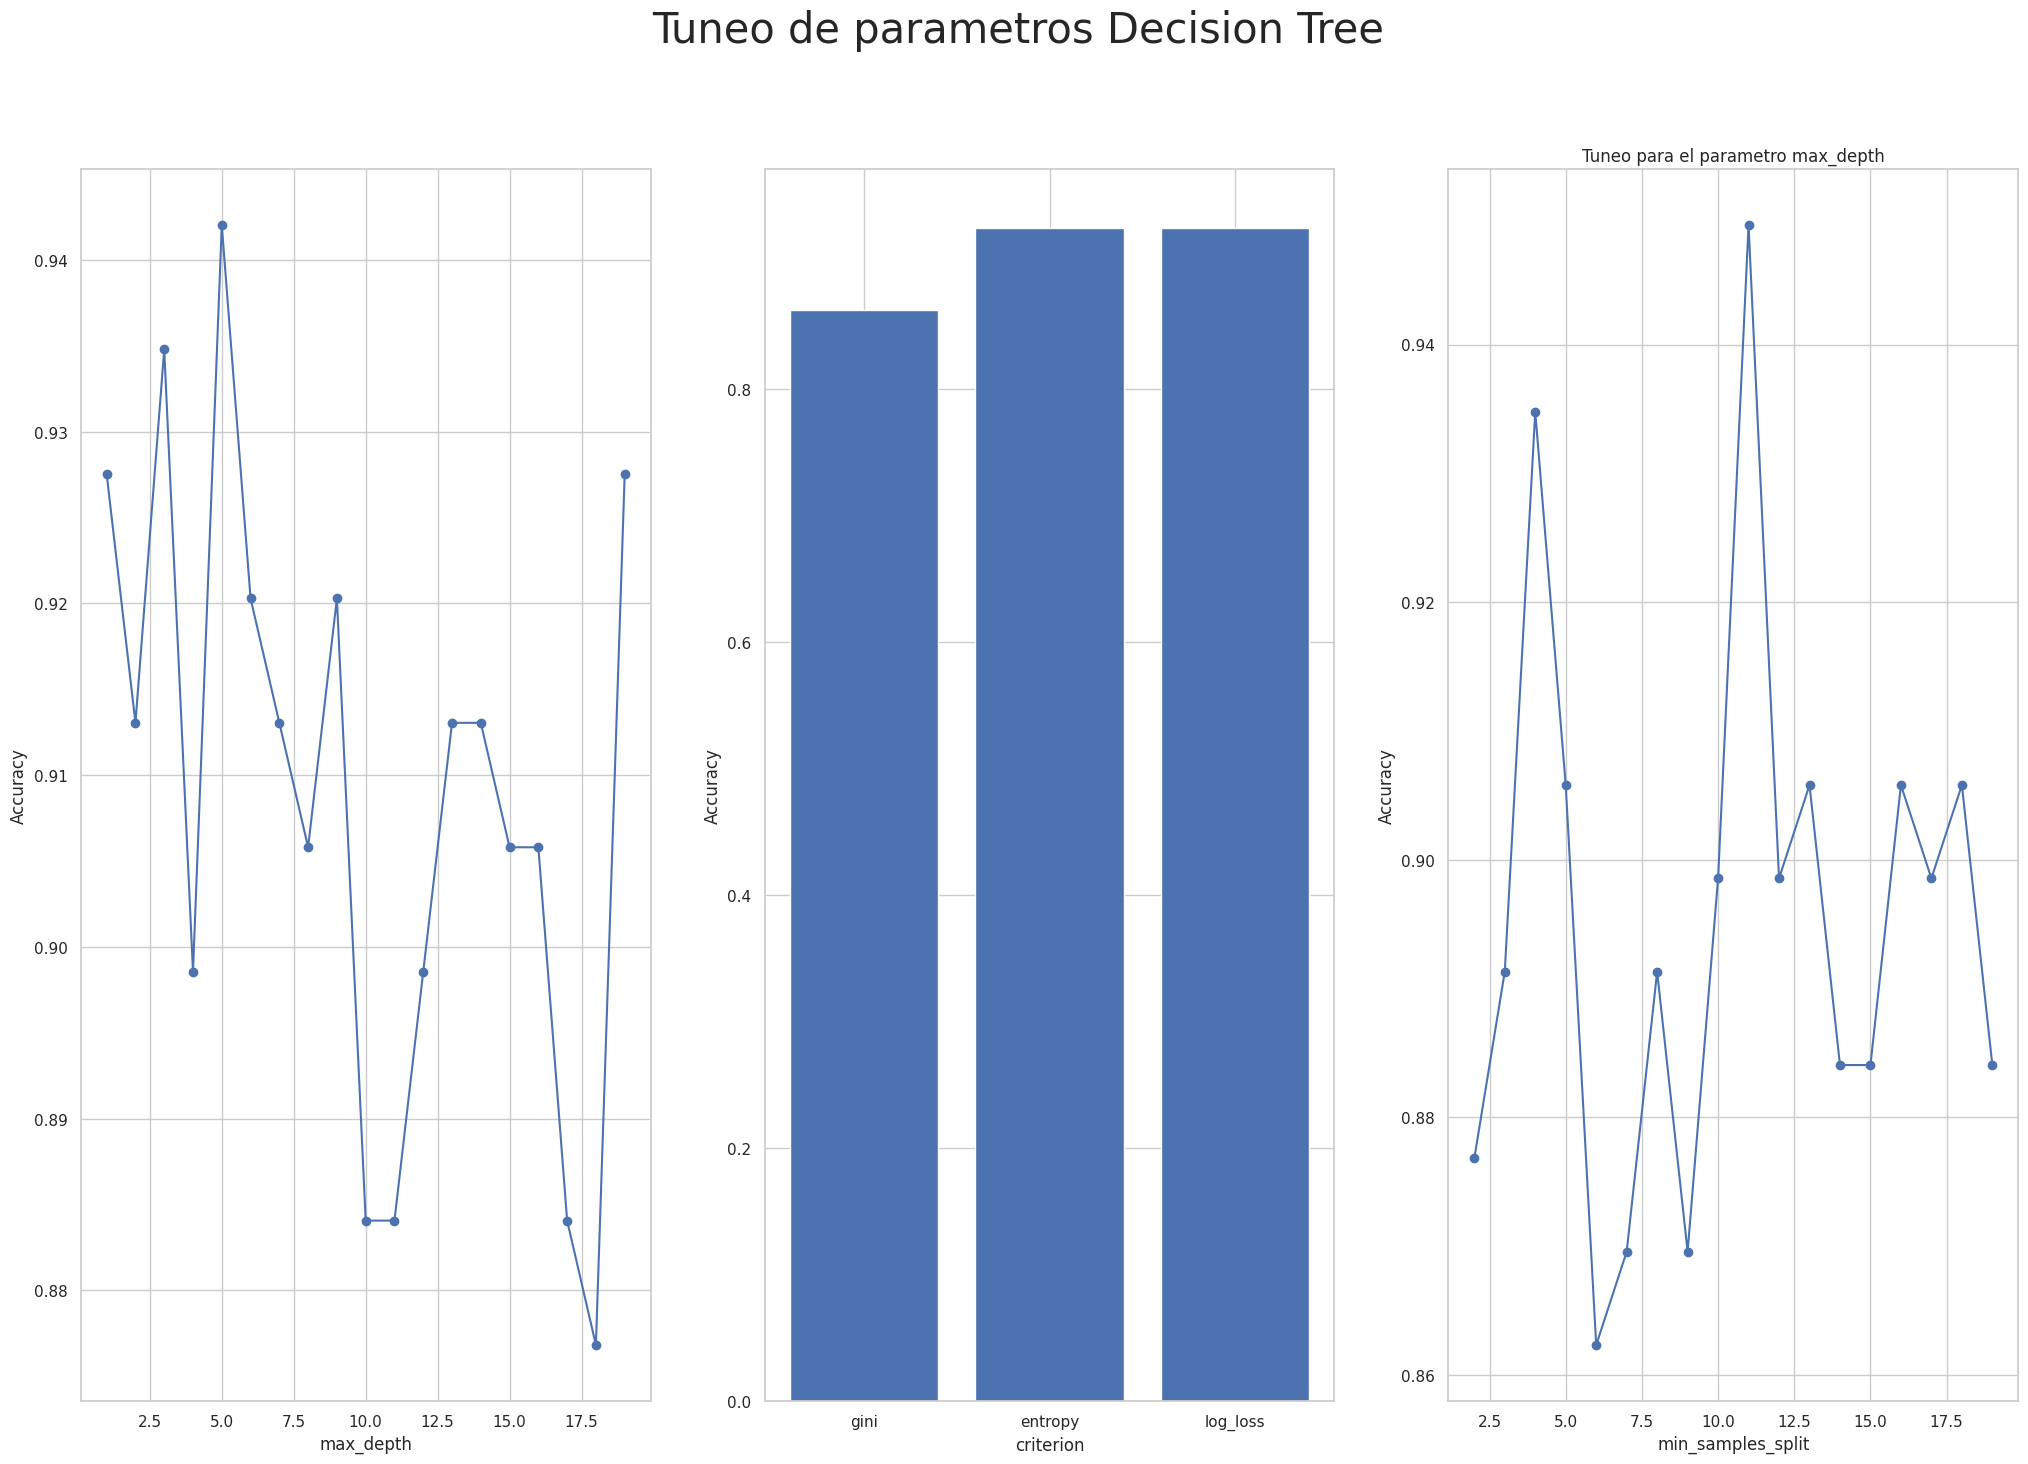

In [ ]:
# Graficas Decision tree

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 16))
fig.suptitle('Tuneo de parametros Decision Tree', size=30)

axes[0].plot(max_depth, accuracy_1_1, marker='o')
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('Accuracy')
plt.title('Tuneo para el parametro max_depth')
plt.grid(True)

axes[1].bar(criterion, accuracy_1_2)
axes[1].set_xlabel('criterion')
axes[1].set_ylabel('Accuracy')
plt.title('Tuneo para el parametro max_depth')
plt.grid(True)

axes[2].plot(min_samples_split, accuracy_1_3, marker='o')
axes[2].set_xlabel('min_samples_split')
axes[2].set_ylabel('Accuracy')
plt.title('Tuneo para el parametro max_depth')
plt.grid(True)

plt.show()

In [ ]:
# Hallar el mejor valor de los hiperparametros para obtener el mejor accuracy
maximo_depth = np.argmax(accuracy_1_1)
maximo_depth = max_depth[maximo_depth]
print('valor de max_depth para el accuracy maximo: ', maximo_depth)

maximo_criterion = np.argmax(accuracy_1_2)
maximo_criterion = criterion[maximo_criterion]
print('valor de criterion para el accuracy maximo: ', maximo_criterion)

maximo_mss = np.argmax(accuracy_1_3)
maximo_mss = min_samples_split[maximo_mss]
print('valor de min_samples_split para el accuracy maximo: ', maximo_mss)

valor de max_depth para el accuracy maximo:  5
valor de criterion para el accuracy maximo:  entropy
valor de min_samples_split para el accuracy maximo:  11


In [ ]:
# Entrenamiento y Testeo del estimador Decision Tree
X = subsample.drop('Class', axis=1)
y = subsample['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

est = DecisionTreeClassifier(max_depth = maximo_depth, criterion=maximo_criterion, min_samples_split = maximo_mss)
est.fit(X_train, y_train)
print('accuracy:', accuracy_score(est.predict(X_test), y_test))

# Cross validation

s = cross_val_score(est, X, y, cv=KFold(2, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy de cross validation %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(2, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(2, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy: 0.9347826086956522
accuracy de cross validation 0.887 (+/- 0.01453)
tpr      0.844 (+/- 0.01299)
tnr      0.883 (+/- 0.00654)


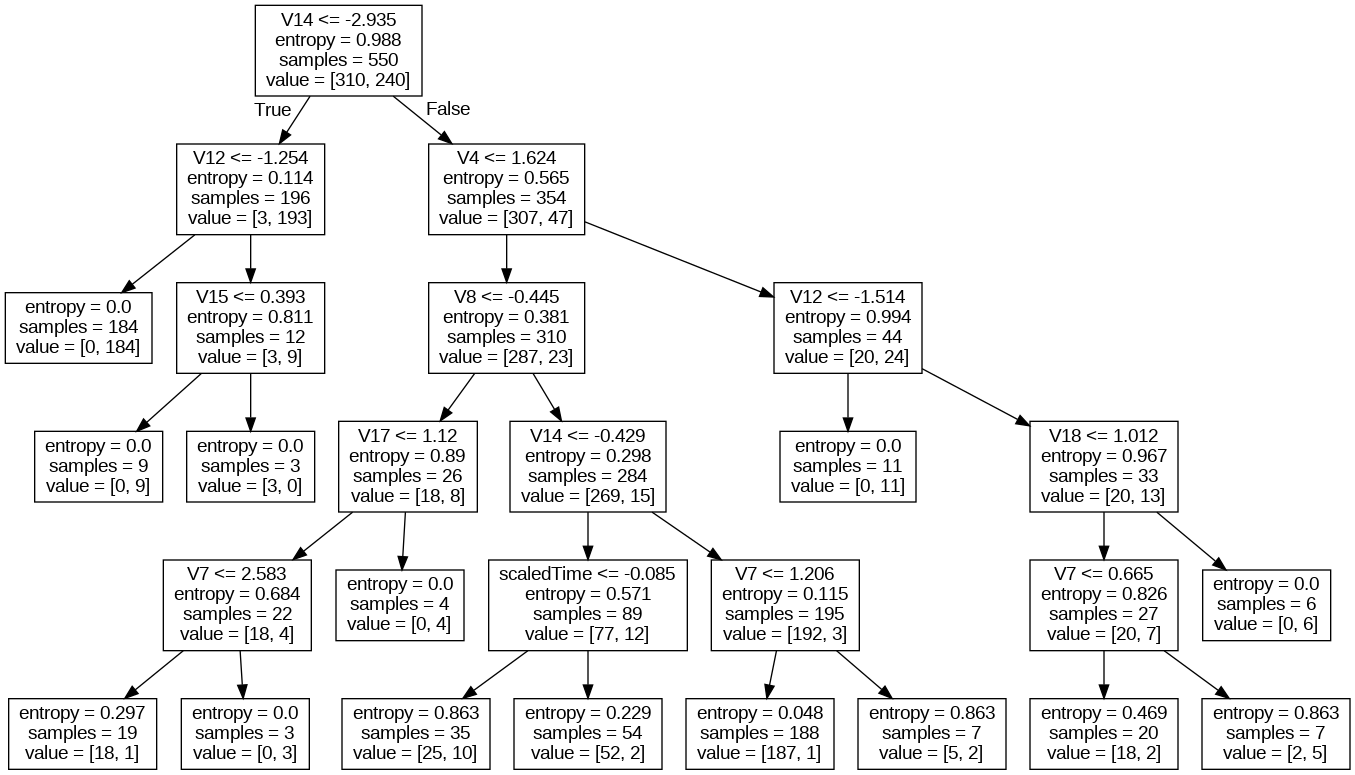

In [ ]:
# Visualizacion del arbol
export_graphviz(est, out_file='tree_c.dot', feature_names=subsample.columns[:-1].values)
!dot -Tpng tree_c.dot > tree_c.png

Image(filename='tree_c.png')

### 3. Random Forest

In [ ]:
# Tuneo de hiperparametros

# n_estimators: Especifica el número de árboles Un mayor número de árboles generalmente
# mejora el rendimiento del modelo, pero también aumenta el tiempo de entrenamiento y predicción.
n_estimators = np.arange(1, 200, step=20)

#max_depth: Especifica la profundidad máxima de cada árbol
max_depth = np.arange(1, 20)

# Criterion: Define la función de calidad que se utiliza para medir la calidad de una división en el árbol.
# Los criterios comunes son "gini" y "entropy". "gini" se refiere al índice Gini y
#"entropy" se refiere a la ganancia de información.
criterion = np.array(['entropy', 'log_loss', 'gini'])

# Establecer un valor adecuado para min_samples_split puede ayudar a controlar el sobreajuste en el modelo.
# Si el valor es muy bajo, el árbol podría hacer divisiones incluso cuando hay un número muy pequeño de muestras en el nodo,
# lo que puede llevar a un ajuste excesivo y un modelo menos generalizable.
min_samples_split = np.arange(2, 20)
accuracy_2_1 = []
accuracy_2_2 = []
accuracy_2_3 = []
accuracy_2_4 = []


for i in n_estimators:
  est = RandomForestClassifier(n_estimators = i)
  est.fit(X_train,y_train)
  accuracy_2_1.append(accuracy_score(est.predict(X_test), y_test))

for j in max_depth:
  est = RandomForestClassifier(max_depth = j)
  est.fit(X_train,y_train)
  accuracy_2_2.append(accuracy_score(est.predict(X_test), y_test))


for k in criterion:
  est = RandomForestClassifier(criterion = k)
  est.fit(X_train,y_train)
  accuracy_2_3.append(accuracy_score(est.predict(X_test), y_test))

for l in min_samples_split:
  est = RandomForestClassifier(min_samples_split = l)
  est.fit(X_train,y_train)
  accuracy_2_4.append(accuracy_score(est.predict(X_test), y_test))


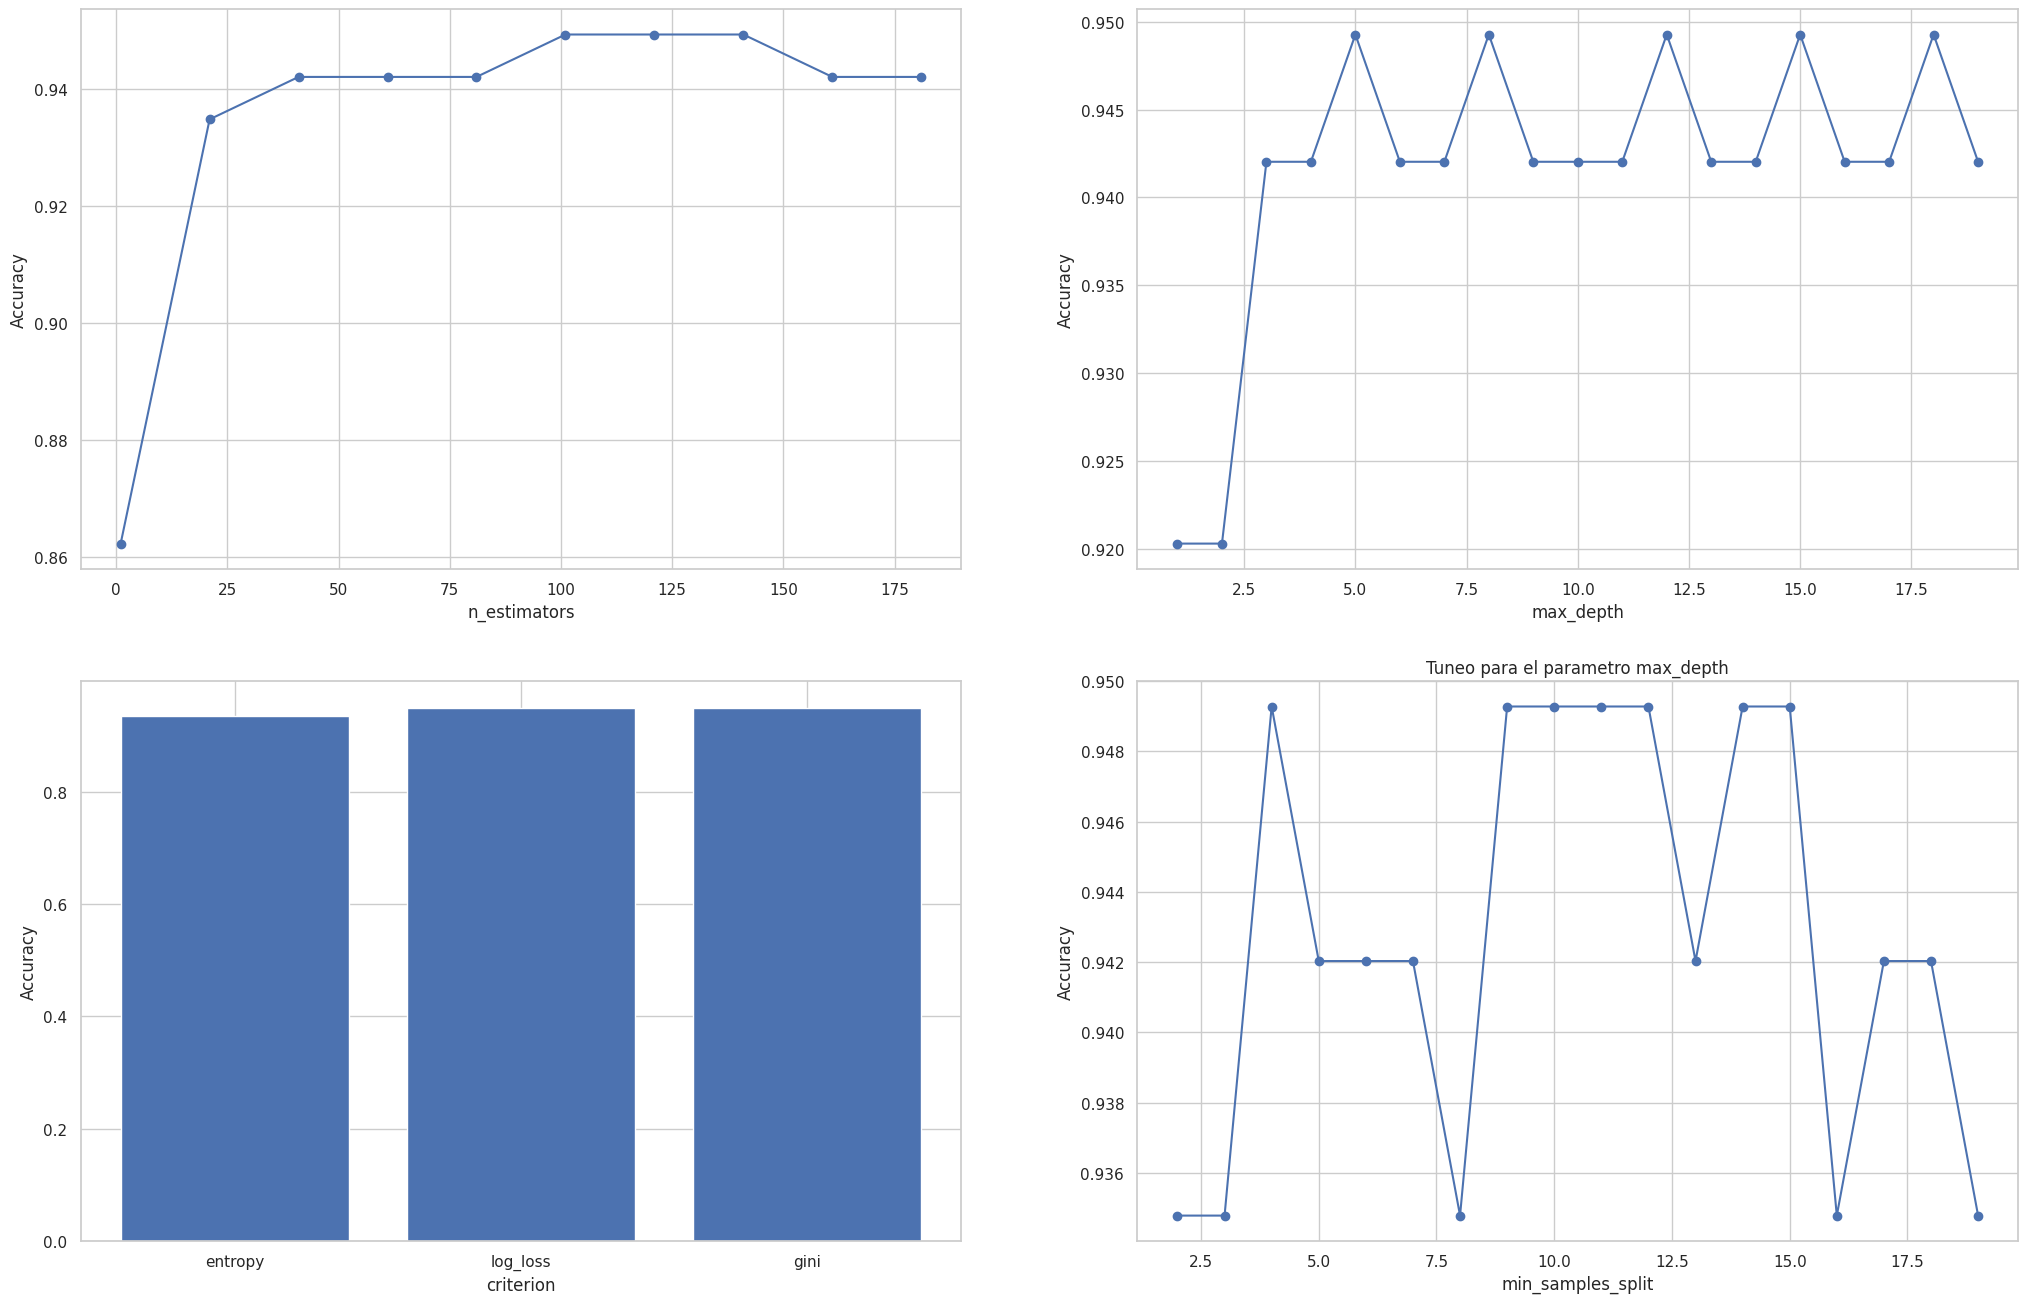

In [ ]:
# Graficas Random Forest

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 16))

axes[0,0].plot(n_estimators, accuracy_2_1, marker='o')
axes[0,0].set_xlabel('n_estimators')
axes[0,0].set_ylabel('Accuracy')
plt.title('Tuneo para el parametro max_depth')
plt.grid(True)

axes[0,1].plot(max_depth, accuracy_2_2, marker='o')
axes[0,1].set_xlabel('max_depth')
axes[0,1].set_ylabel('Accuracy')
plt.title('Tuneo para el parametro max_depth')
plt.grid(True)

axes[1,0].bar(criterion, accuracy_2_3)
axes[1,0].set_xlabel('criterion')
axes[1,0].set_ylabel('Accuracy')
plt.title('Tuneo para el parametro max_depth')
plt.grid(True)


axes[1,1].plot(min_samples_split, accuracy_2_4, marker='o')
axes[1,1].set_xlabel('min_samples_split')
axes[1,1].set_ylabel('Accuracy')
plt.title('Tuneo para el parametro max_depth')
plt.grid(True)
plt.show()


In [ ]:
# Hallar el mejor valor de los hiperparametros para obtener el mejor accuracy
max_n_estimators = np.argmax(accuracy_2_1)
max_n_estimators = n_estimators[max_n_estimators]
print('valor de n_estimators para el accuracy maximo: ', max_n_estimators)


maximo_depth_2 = np.argmax(accuracy_2_2)
maximo_depth_2 = max_depth[maximo_depth_2]
print('valor de max_depth para el accuracy maximo: ', maximo_depth_2)

maximo_criterion_2 = np.argmax(accuracy_2_3)
maximo_criterion_2 = criterion[maximo_criterion_2]
print('valor de criterion para el accuracy maximo: ', maximo_criterion_2)

maximo_mss_2 = np.argmax(accuracy_2_4)
maximo_mss_2 = min_samples_split[maximo_mss_2]
print('valor de min_samples_split para el accuracy maximo: ', maximo_mss_2)

valor de n_estimators para el accuracy maximo:  101
valor de max_depth para el accuracy maximo:  5
valor de criterion para el accuracy maximo:  log_loss
valor de min_samples_split para el accuracy maximo:  4


In [ ]:
# Entrenamiento y Testeo del estimador Random Forest
X = subsample.drop('Class', axis=1)
y = subsample['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

est = RandomForestClassifier(n_estimators = max_n_estimators, max_depth = maximo_depth_2, criterion=maximo_criterion_2, min_samples_split = maximo_mss_2)
est.fit(X_train, y_train)
print('accuracy:', accuracy_score(est.predict(X_test), y_test))

# Cross validation

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy de cross validation %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy: 0.9420289855072463
accuracy de cross validation 0.924 (+/- 0.03191)
tpr      0.847 (+/- 0.06662)
tnr      0.981 (+/- 0.01949)


### 4. Support Vector Machine (SVM)

In [ ]:
# Tuneo de hiperparametros Support Vector Machine (SVM)

X = subsample.drop('Class', axis=1)
y = subsample['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
C = np.arange(1, 40)
kernel = np.array([ 'linear', 'poly', 'rbf','sigmoid'])
gamma =  np.array([0.1, 1.3, 3.5, 6.9])
accuracy_1_1 = []
accuracy_1_2 = []
accuracy_1_3 = []


for i in C:
  est = SVC( C=i)
  est.fit(X_train,y_train)
  accuracy_1_1.append(accuracy_score(est.predict(X_test), y_test))

for j in kernel:
  svm = SVC( kernel=j)
  svm.fit(X_train,y_train)
  accuracy_1_2.append(accuracy_score(est.predict(X_test), y_test))


for K in gamma:
  svm = SVC( gamma = K)
  svm.fit(X_train,y_train)
  accuracy_1_3.append(accuracy_score(est.predict(X_test), y_test))

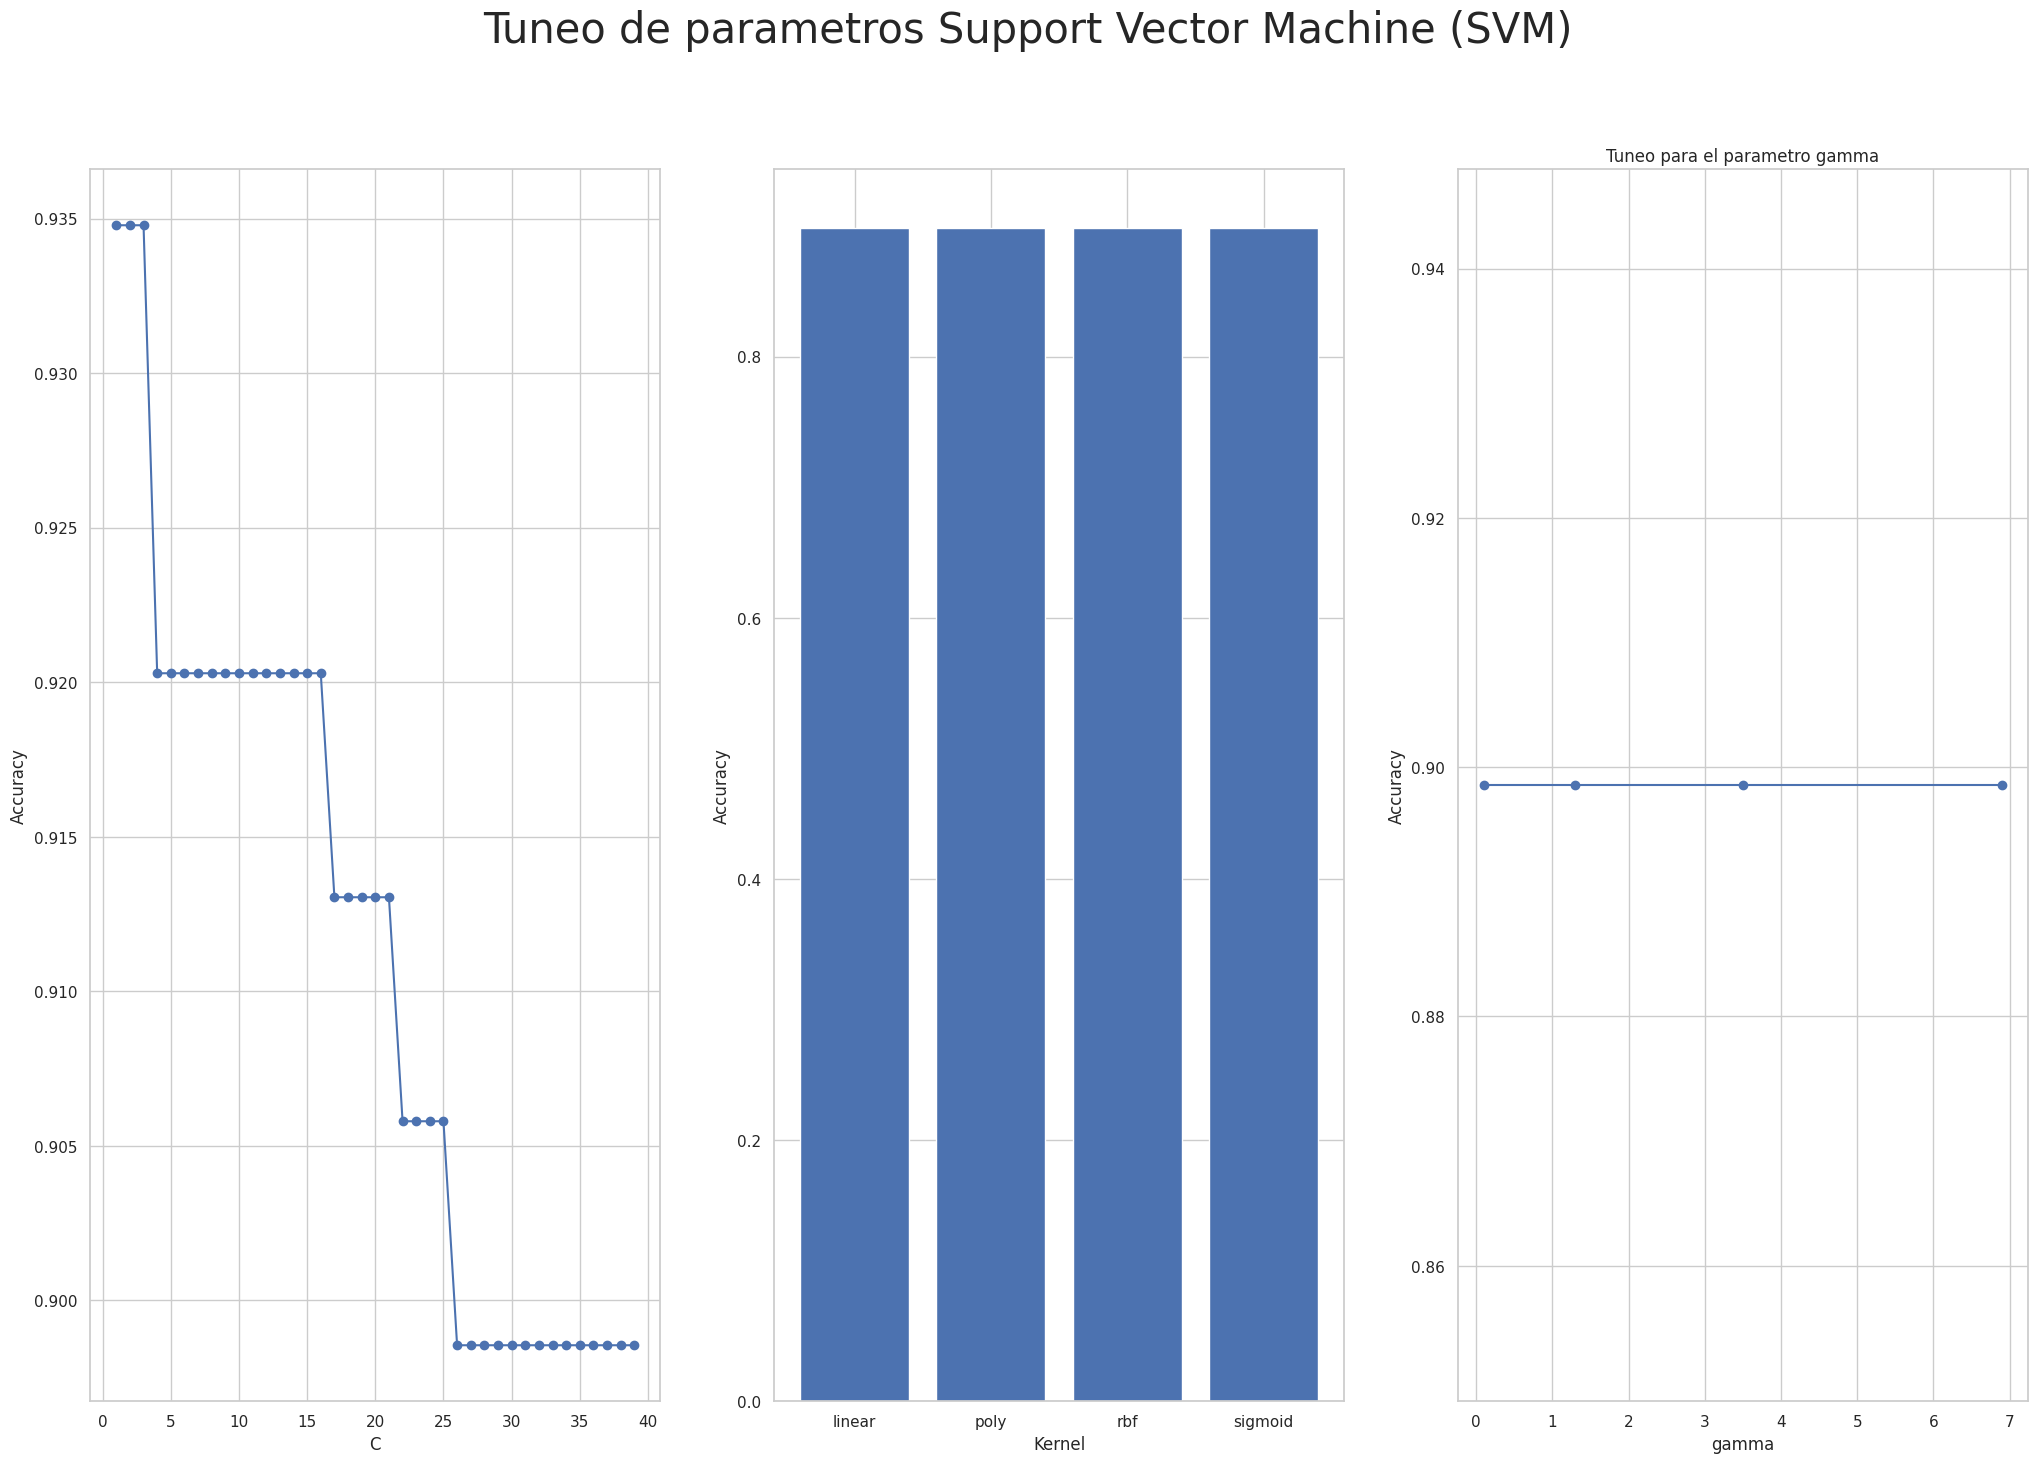

In [ ]:
# Graficas Support Vector Machine (SVM)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 16))
fig.suptitle('Tuneo de parametros Support Vector Machine (SVM)', size=30)

# El parámetro C controla el equilibrio entre clasificar correctamente los puntos de datos de entrenamiento y
# lograr un margen suave. Un valor más pequeño de C hará que el modelo sea más tolerante a errores de clasificación y
# buscará un margen más grande, mientras que un valor más grande de C hará que el modelo se ajuste más a los puntos de datos de entrenamiento y
# puede llevar a un margen más estrecho.

axes[0].plot(C, accuracy_1_1, marker='o')
axes[0].set_xlabel('C')
axes[0].set_ylabel('Accuracy')
plt.title('Tuneo para el parametro C')
plt.grid(True)

axes[1].bar(kernel, accuracy_1_2)
axes[1].set_xlabel('Kernel')
axes[1].set_ylabel('Accuracy')
plt.title('Tuneo para el parametro kernel')
plt.grid(True)

axes[2].plot(gamma, accuracy_1_3, marker='o')
axes[2].set_xlabel('gamma')
axes[2].set_ylabel('Accuracy')
plt.title('Tuneo para el parametro gamma')
plt.grid(True)

plt.show()

In [ ]:
# Hallar el mejor valor de los hiperparametros para obtener el mejor accuracy
maximo_C = np.argmax(accuracy_1_1)
maximo_C = C[maximo_C]
print('valor de C para el accuracy maximo: ', maximo_C)

maximo_kernel = np.argmax(accuracy_1_2)
maximo_kernel = kernel[maximo_kernel]
print('valor de kernel para el accuracy maximo: ', maximo_kernel)

maximo_gamma = np.argmax(accuracy_1_3)
maximo_gamma = gamma[maximo_gamma]
print('valor de gamma para el accuracy maximo: ', maximo_gamma)

valor de C para el accuracy maximo:  1
valor de kernel para el accuracy maximo:  linear
valor de gamma para el accuracy maximo:  0.1


In [ ]:
# Entrenamiento y Testeo del estimador Support Vector Machine (SVM)
X = subsample.drop('Class', axis=1)
y = subsample['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

est = SVC(C = maximo_C, kernel=maximo_kernel, gamma = maximo_gamma)
est.fit(X_train, y_train)
print('accuracy:', accuracy_score(est.predict(X_test), y_test))

# SVM classification and cross validation

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy cross validation Support Vector Machine (SVM) %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy: 0.9347826086956522
accuracy cross validation Support Vector Machine (SVM) 0.929 (+/- 0.04175)
tpr      0.885 (+/- 0.04053)
tnr      0.963 (+/- 0.03000)


# **TERCERA ENTREGA**

### MODELO DNN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 12,354
Trainable params: 12,354
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14/14 [==============================] - 1s 21ms/step - loss: 0.4794 - accuracy: 0.8327 - val_loss: 0.4411 - val_accuracy: 0.8188
Epoch 2/10
14/14 [=========================

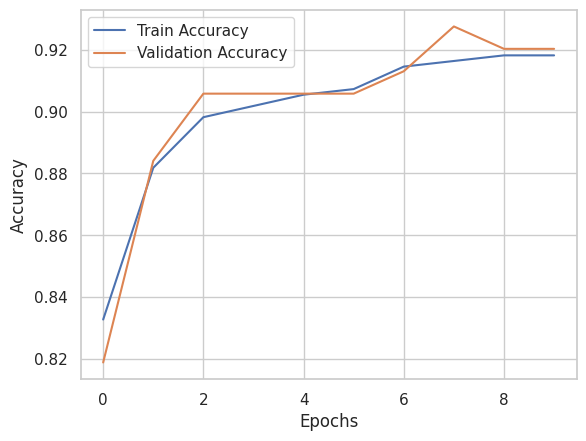

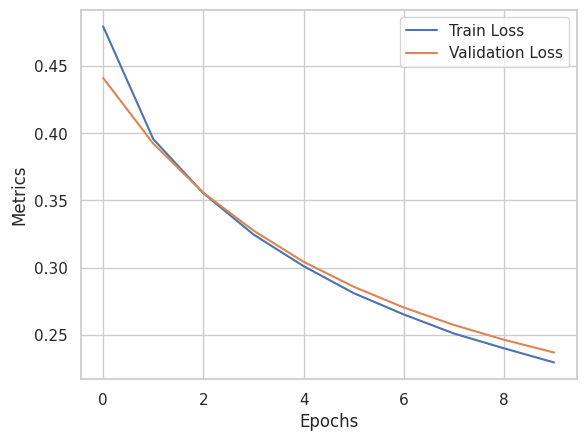

In [ ]:
from tensorflow.keras.layers import Dropout
#Agregamos regularización, para evitar el sobreajuste

model_dnn = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.2), #Se Agrega dropout con una tasa de 0.2 (20%)
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model_dnn.summary()

model_dnn.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_dnn.fit(X_train,
          y_train,
          epochs=10,
          batch_size=40,
          validation_data=(X_test, y_test))

test_loss, test_acc = model_dnn.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Graficar la precisión y la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Train Loss')  # Agregar la línea para trazar la pérdida
plt.plot(history.history['val_loss'], label='Validation Loss')  # Agregar la línea para trazar la pérdida
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

### ALGORITMOS GENÉTICOS

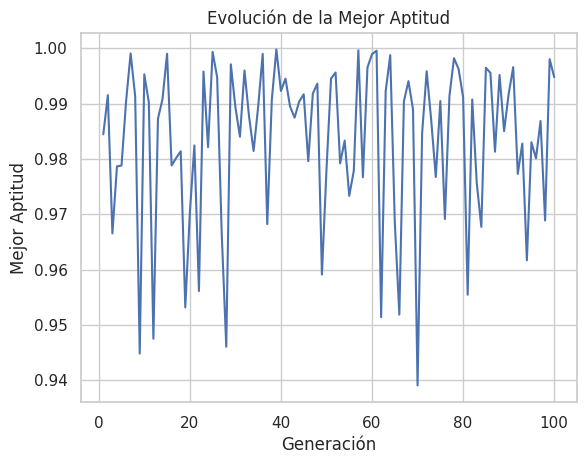

In [ ]:

import random

def cargar_dataset():

    ruta_archivo = "/content/drive/MyDrive/Proyecto_Final_IA/creditcard.csv"

    dataframe = pd.read_csv(ruta_archivo)

    X = dataframe.drop('Class', axis=1)
    y = dataframe['Class']

    return X, y

def generar_poblacion(tamano_poblacion, num_caracteristicas):
    poblacion = []
    for _ in range(tamano_poblacion):
        individuo = [random.random() for _ in range(num_caracteristicas)]
        poblacion.append(individuo)
    return poblacion


def evaluar_aptitud(individuo, X, y):
    # Aquí se implemetaría un modelo para evaluar la aptitud del individuo en base al dataset
    # Retorna algún valor que represente la calidad del individuo, como el acuraci o la función de pérdida
    return random.random()

# Función para seleccionar los individuos que se reproducirán
def seleccionar_padres(poblacion, aptitudes):
    padres = random.choices(poblacion, weights=aptitudes, k=2)
    return padres

# Función para aplicar el cruce entre dos individuos
def cruzar(padre1, padre2):
    punto_corte = random.randint(1, len(padre1)-1)
    hijo1 = padre1[:punto_corte] + padre2[punto_corte:]
    hijo2 = padre2[:punto_corte] + padre1[punto_corte:]
    return hijo1, hijo2

# Función para aplicar una mutación a un individuo
def mutar(individuo, tasa_mutacion):
    mutado = []
    for gen in individuo:
        if random.random() < tasa_mutacion:
            mutado.append(random.random())
        else:
            mutado.append(gen)
    return mutado

# Función para reemplazar algunos individuos de la población
def reemplazar(poblacion, descendencia, aptitudes):
    poblacion_nueva = list(poblacion)
    peores_individuos = sorted(range(len(aptitudes)), key=lambda i: aptitudes[i])[:len(descendencia)]
    for i, indice in enumerate(peores_individuos):
        poblacion_nueva[indice] = descendencia[i]
    return poblacion_nueva

# Función del algoritmo genético
def algoritmo_genetico(tamano_poblacion, num_generaciones, tasa_mutacion):
    X, y = cargar_dataset()
    num_caracteristicas = X.shape[1]

    poblacion = generar_poblacion(tamano_poblacion, num_caracteristicas)
    mejores_aptitudes = []

    for generacion in range(num_generaciones):
        aptitudes = [evaluar_aptitud(individuo, X, y) for individuo in poblacion]
        mejor_aptitud = max(aptitudes)
        mejores_aptitudes.append(mejor_aptitud)

        padres = seleccionar_padres(poblacion, aptitudes)
        descendencia = []

        for _ in range(tamano_poblacion // 2):
            hijo1, hijo2 = cruzar(padres[0], padres[1])
            descendencia.append(hijo1)
            descendencia.append(hijo2)

        descendencia = [mutar(individuo, tasa_mutacion) for individuo in descendencia]
        poblacion = reemplazar(poblacion, descendencia, aptitudes)

    # Genera el gráfico de la evolución de la mejor aptitud
    generaciones = range(1, num_generaciones + 1)
    plt.plot(generaciones, mejores_aptitudes)
    plt.xlabel('Generación')
    plt.ylabel('Mejor Aptitud')
    plt.title('Evolución de la Mejor Aptitud')
    plt.show()

tamano_poblacion = 50
num_generaciones = 100
tasa_mutacion = 0.1

algoritmo_genetico(tamano_poblacion, num_generaciones, tasa_mutacion)

<ipython-input-53-c8ebeafdfae3>:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_pca[:, 0], data_pca[:, 1], cmap='rainbow')


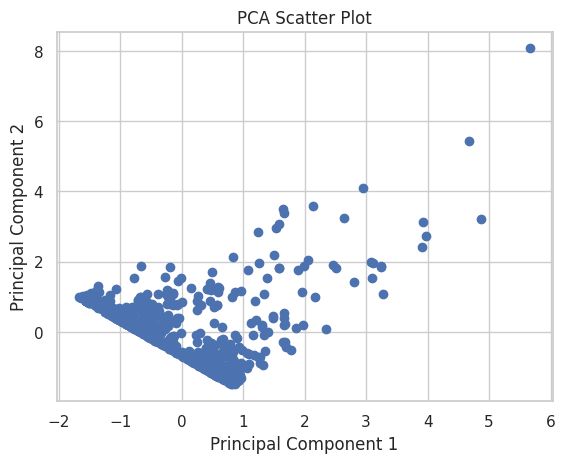

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecciona las columnas relevantes para PCA
data_pca = subsample[['scaledTime', 'scaledAmount']]

# Normaliza los datos utilizando StandardScaler
scaler = StandardScaler()
data_pca = scaler.fit_transform(data_pca)

# Crea una instancia de PCA y especifica el número de componentes deseados (en este caso, 2)
pca = PCA(n_components=2)

# Ajusta y transforma los datos con PCA
data_pca = pca.fit_transform(data_pca)

# Grafica los datos transformados por PCA
plt.scatter(data_pca[:, 0], data_pca[:, 1], cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


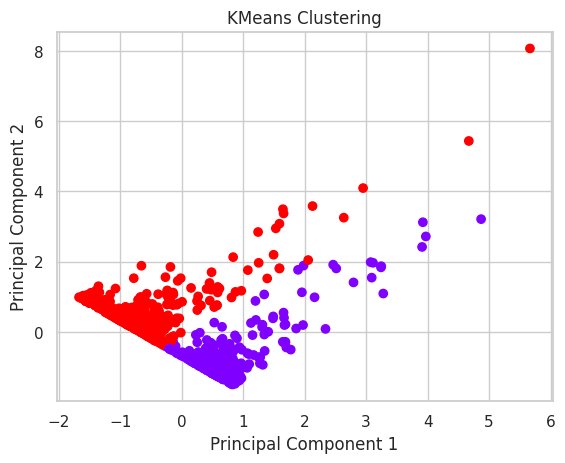

In [ ]:
from sklearn.cluster import KMeans

# Aplica KMeans al conjunto de datos
kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(data_pca)

# Grafica los resultados del clustering con KMeans
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.show()


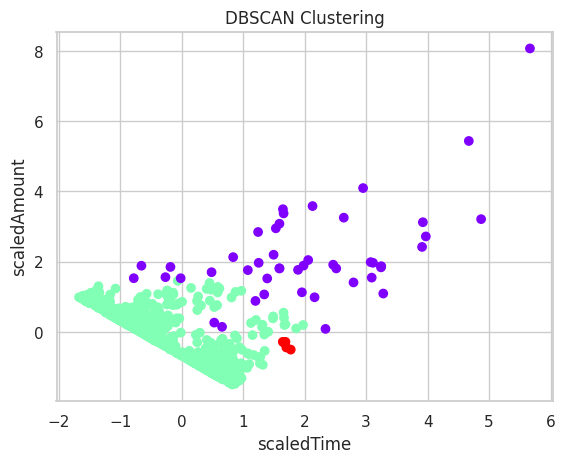

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

eps = 0.3
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(data_pca)


plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('scaledTime')
plt.ylabel('scaledAmount')
plt.title("DBSCAN Clustering")
plt.show()